##### Data Analysis 2021 - Coursework 2 (45%)
# Analysing gravitational wave signals 
## Deadline Friday week 11, 2pm.

#### <div class = "tip">Instructions</div>

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 45% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework. 

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a pdf file. **Don't forget to click `run all` before you export it**. You can constantly update the Turnitin submission until the deadline.
- The breakdown of the assessment criteria is provided below.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

#### <div class = "tip">Tips</div>


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You may find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

Gravitational waves are disturbances in the curvature of spacetime, generated by accelerated masses, that propagate as waves outward from their source at the speed of light.  They are predicted in General Relativity and other theories of gravity and since 2017, they have now been observed!

In this exercise we will analyse some mock gravitational wave data from two unknown astrophysical objects merging together and coelescing. We will use a Monte Carlo Markov Chain (MCMC) to compare a scaled model that predicts how the wave changes depending on the total mass of the merging objects and their distance from us to the observed waveform.  This will allow us to determine the nature of the orbiting objects that merged to form the gravitational wave using MCMC, whether for instance they could be originating from merging white dwarfs, neutron stars or black holes.

The mock or simulated waveforms measure the strain as two compact, dense astrophysical objects coalesce. The strain describes the amplitude of the wave. The system is parameterised by the masses of the merging objects, $M_1$ and $M_2$, and their distance from the observer $D$.  

Other useful parameters and equations relevant for this assessment are given in the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb).

***

## Part A - Some background 

1. How do astronomers know that the gravitational waves from the GW150914 event were due to two black holes merging? <div align="right">**[2 marks]**</div><br>

2. Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event.   <div align="right">**[3 marks]**</div><br>
 
3. The file ``gravitationalwaveevents.csv`` contains the properties of previously observed gravitational waves. Ultimately, we will aim to compare your merger event results with the properties from previously observed gravitational waves. Parameters obtained for these systems are known as posteriors as they are derived using Bayes Theorem (ie posterior = likelihood $\times$ prior). The errors in these values are the credible intervals from the posterior distribution derived for each parameter. Plot the **total** mass of the merging sources against their distance.   <div align="right">**[10 marks]** </div>

# **Answer:**

# A.1)

In order to make measures and statements about the nature of the singal,astronomers used physical instruments.This modern instruments are laser interferometes that measures length changes in the laser light which travels along the "arms"(path) of the interometers. At the end of the arms  are mirrors that resend the laser beam back Depending on the path difference between the two arms, the light beam signal outpout can be amplified (“constructive interference”) or can be cancel out (destructive interference).

In the case of GW150914 event,two aLIGO interferometric detectors(in Hanford and in Livingston) observed a signal with the same waveform for each detecetor and within a very small time delay(7ms). These facts make astronomers certain that GW150914 was really  a gravitational wave.


In order to deduce that gravitational waves come from merging the two black holes, astronomers have created models of all possible objects that could merge.These models are compared with the data of the observed event. In the case of GW150914 event data and model suggest that it was due to two  lack holes with 29 and 36 solar masses, which merged 1.3 billion light years from Earth. 


We must take into account that there is a small chance that GW150914 event were due to random noise for both aLigo detectors(once in 200.000yeas) However,since the statiscal significance for the event GW150914 is more tahn 5 sigma, astronomers can affirm that it is very likely that GW150914 is a real astrophysical event due to  two black holes merging


[Bibliography]

[1] https://www.einstein-online.info/en/spotlight/observation-of-gravitational-waves-from-a-binary-black-hole-merger/

[2] https://www.nature.com/articles/d41586-020-02524-w

[3] https://www.scientificamerican.com/article/astronomers-may-have-glimpsed-light-from-merging-black-holes/

 # A.2)

From bibliography [1] https://www.einstein-online.info/en/spotlight/observation-of-gravitational-waves-from-a-binary-black-hole-merger/

We are gonna answer this question by analysing the following image:
    

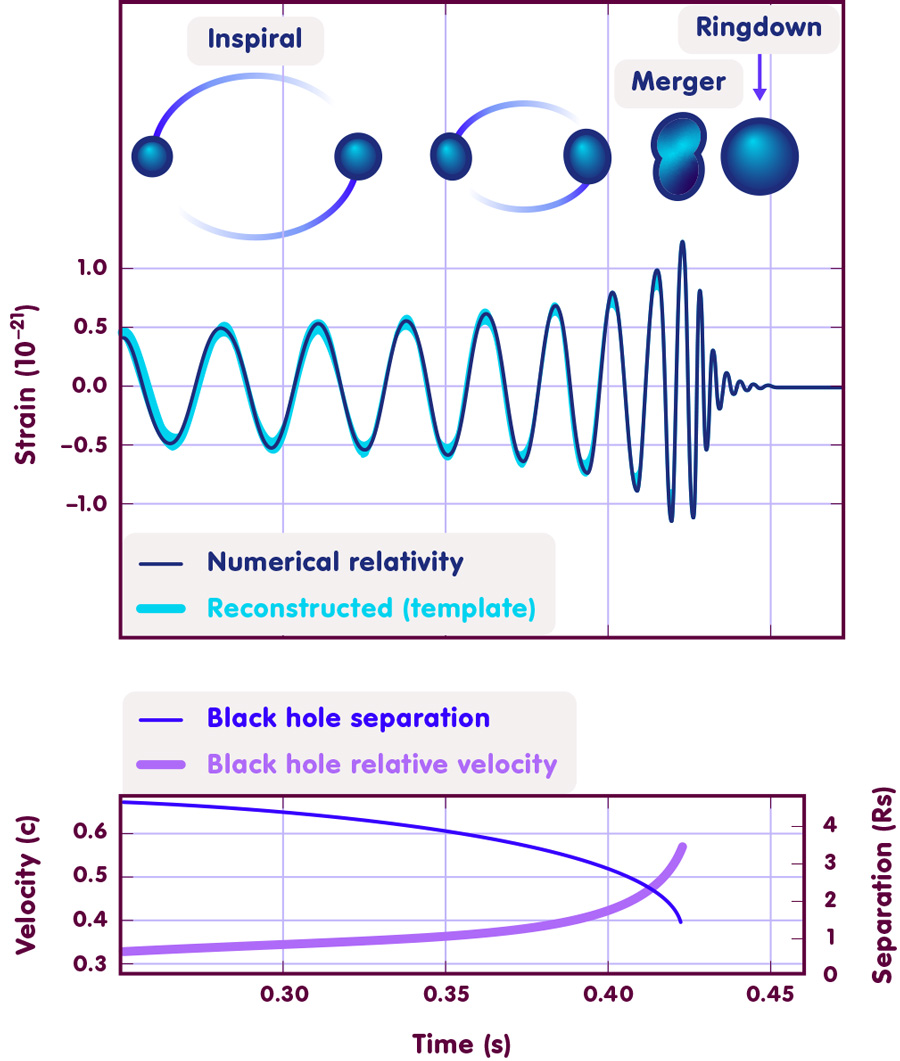

On top: Estimated gravitational wave amplitude of GW150914 at the Hanford detector. Above that are the Schwarzschild horizons of both merging black holes shown as calculated numerically from the general theory of relativity. Below: The effective distance of the black holes in units of Schwarzschild radii RS and the relative velocity in units of the speed of light. [Image: LIGO / Redesign: Daniela Leitner]

As we can see for the first images,there are three different parts in the waveform produced due to gravitational waves from a merging black hole event:

1) Inspiral phase. Gravitational waves are generated during the end-of-life stage of the black-hole binary system.We can see in the image how  the frequency of the gravitational waves increase slowly until the moment of coalescence(as the system loses energy, the orbital separation shrinks). However,the the signal is basically a sinusoid and can be described using Newtonian dynamics.

2) Merger phase . The two bodies are so close together that is important to consider relativistic effects.The two black holes meet and we can see how the frecuency increase drastically reaching its maximum value.Gravitational wave emission peaks at this time.

3) Ringdown phase .It is the final stage and happens immediately following the merger.The signal is an exponentially damped sinusoid.Waves have a fast reducing oscillation because emitted gravitational waves go towards the event horizon.

# A.3)

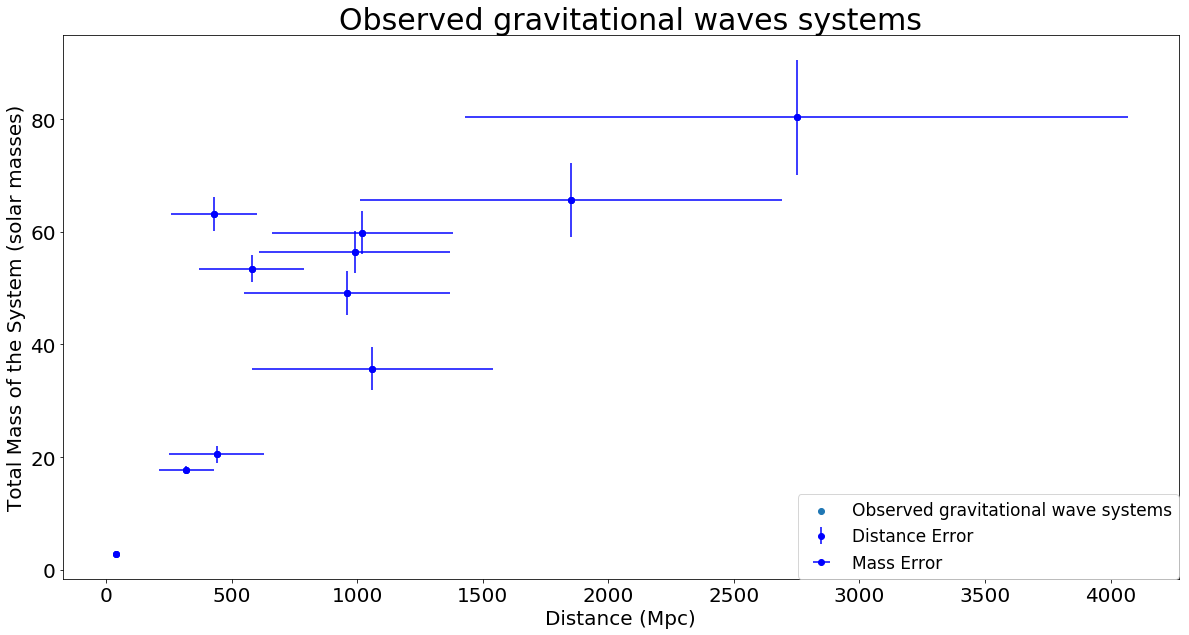

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


data1 = pd.read_csv('gravitationalwaveevents.csv') #Firt we need to read the csv file and load it into python

Distance=(data1['DL'])[0:11]         #After making a fast look at the csv file We can see that there  information from the mass data until row 12
Distance_error=(data1['DL_err'])[0:11]
Mtot=(data1['Mtot'])[0:11]            
Mtot_error=(data1['Mtot_err'])[0:11]      #For replacing empty string values to zeros
fig, ax = plt.subplots(figsize=(20, 10))


ax.scatter(Distance, Mtot,label='Observed gravitational wave systems')


ax.set_xlabel('Distance (Mpc)',size=20)
ax.set_ylabel('Total Mass of the System (solar masses)',size=20)
ax.set_title('  Observed gravitational waves systems',size=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.errorbar(Distance, Mtot, yerr=Mtot_error, fmt='o',color='blue',label='Distance Error')
plt.errorbar(Distance, Mtot, xerr=Distance_error, fmt='o',color='blue',label='Mass Error')
plt.legend(loc='lower right', borderaxespad=0.,fontsize=17)
plt.show()



** We can see from the figure that the greater the distance of the gravitational wave system, the greater the distance uncertainty. However,the mass 
uncertainty is similar for  all the system,although it becomes a little smaller for the smaller and closer systems.
This uncertainty is due to the Measure instruments.
Also,as a first guess, we can observe a liner relationship between Mass and Distance.
However,this is just a prior guess and much more data (and deep analsis) is required.**

## Part B - The data

Now it is your turn to look at observations of a gravitational wave event. 

1. Read in the datafile of the observed waveform `Observedwaveform.csv`. These files store the strain as a function of "GPS time" for the merger of two bodies. <div align="right">**[5 marks]**</div><br>

2. The GPS time of the merger for your waveform is 1205951542.153363.  Your data will need to be shifted so that the merger occurs at time = 0 secs.  This is required as we will compare our data with a which have the merger at t=0s.  <div align="right">**[4 marks]**</div><br>

3. We need to estimate the average noise and its standard deviation in our data. This requires careful thought about where the noise can be seen in the waveform.   <div align="right">**[6 marks]**</div>

# **Answer:**

# B.1) 

In [4]:
data2=pd.read_csv('Observedwaveform.csv')   #Firt we need to read the csv file and load it into python
strainobserved=data2['strain']
timeobserved1=data2['time (s)']


In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
data2

,strain,time (s)
0,8.101405e-23,1.205952e+09
1,1.019082e-22,1.205952e+09
2,1.226521e-22,1.205952e+09
3,1.396412e-22,1.205952e+09
4,1.522380e-22,1.205952e+09
5,1.633110e-22,1.205952e+09
6,1.775375e-22,1.205952e+09
7,1.983757e-22,1.205952e+09
8,2.254330e-22,1.205952e+09
9,2.538071e-22,1.205952e+09


# B.2) 

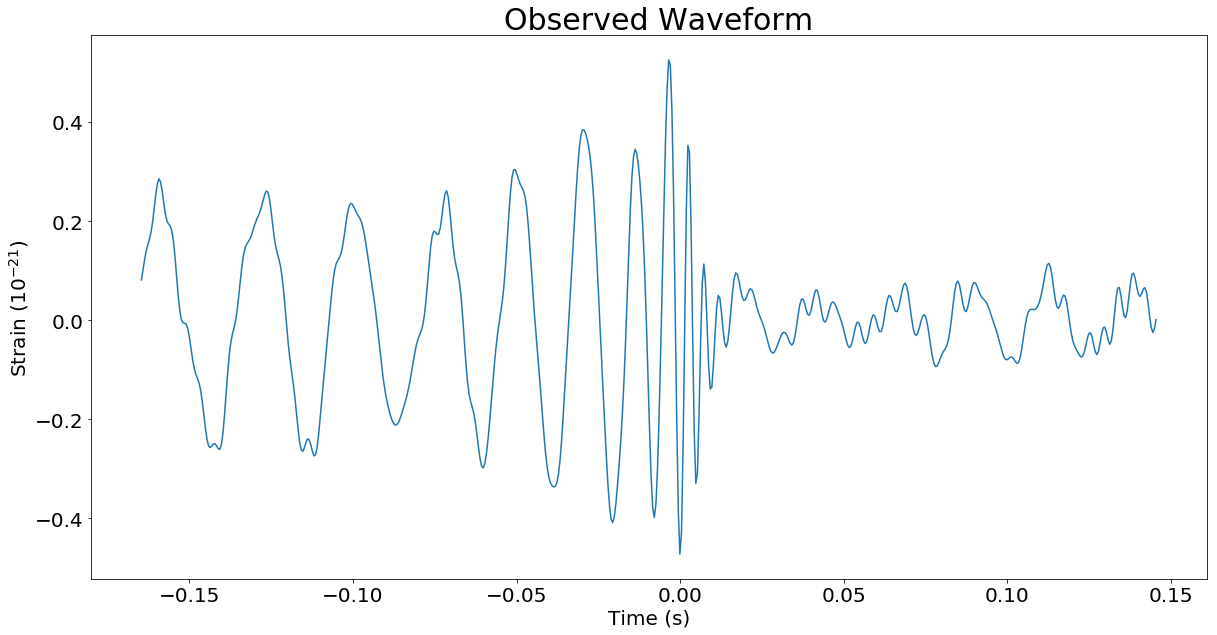

In [6]:
timeobserved=timeobserved1-1205951542.153363      #if we want the shift our data we sould substract all the arry the quanty given by the question
fig, ax = plt.subplots(figsize=(20, 10))


ax.plot(timeobserved,strainobserved*(10**21))
ax.set_xlabel('Time (s)',size=20)
ax.set_ylabel(r'Strain $(10^{-21}$)',size=20)
ax.set_title('  Observed Waveform',size=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()



**We can see that the observed gravitational wave has a clear signal shape.It presents some irregularities at the highest and lowest points of the wave.However,we can clearly distinguish inspiral ,merger and rigdown phases studied in Question A.**

# B.3) 

The signal is disturbed by the presence of background noise (which we model as Gaussian). Thus, the
detectors capture a time series composed of the signal from the source $h(t)$ and the noise
$n(t)$:

$s(t) = h(t) + n(t)$

It is usually associated with measuring instruments, in this case, interferometers.
There are different types of noise coming from these detectors, among them, the most important are:
Seismic noise,thermal noise,quantum noise,gas noise. 

In [7]:

#First Lets calculate the standar deviation of our data
sde=np.std(strainobserved)
print('The standard deviation in our data is  {:.3g}'.format(sde))

#Now lets calculate the avarage noise of our signal
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

an=signaltonoise(strainobserved)

print('The  Signal To noise in our data is  {:.3g}'.format(an))

The standard deviation in our data is  1.61e-22
The  Signal To noise in our data is  0.0252


## Part C - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") 

In this part of the question we will attempt to produce a waveform for any mass and distance values using a reference waveform with $M=40 M_{sun}$, $D=1$Mpc and $q=M_2/M_1 = 1$ and scaling it by any new mass and/or distance.    

The reference waveform/template we will use is```reference_Mtot40Msun_Dist1Mpc.csv```. 

You will need to follow the steps below when answering this question:

1. Open the reference/template file using the `pandas` package. Write a function in python to scale the time and strain of any waveform with $q=1$, total mass $M$ and distance $D$ from the reference waveform file ```reference_Mtot40Msun_Dist1Mpc.csv``` using the equations for how the waveform strain and time depends on mass and distance from [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb). <div align="right"> **[10 marks]**</div><br>

2. Test your function works by substituting in $M=70\,M_{sun}$ and $D=5$Mpc, and compare your resulting waveform with the template in `reference_Mtot70Msun_Dist5Mpc.csv`.  Comment on your result. <div align="right">**[7 marks]**</div><br>
 
3. Use your function to scale the template waveform ($M=40 M_{sun}$, $D=1$Mpc) to make an initial rough estimate "by eye" of the total mass and distance that "best" fits your data (e.g. to within +/- 5 Msun, +/- 100 Mpc). <div align="right">**[8 marks]**</div>

# **Answer:**

# C.1) 

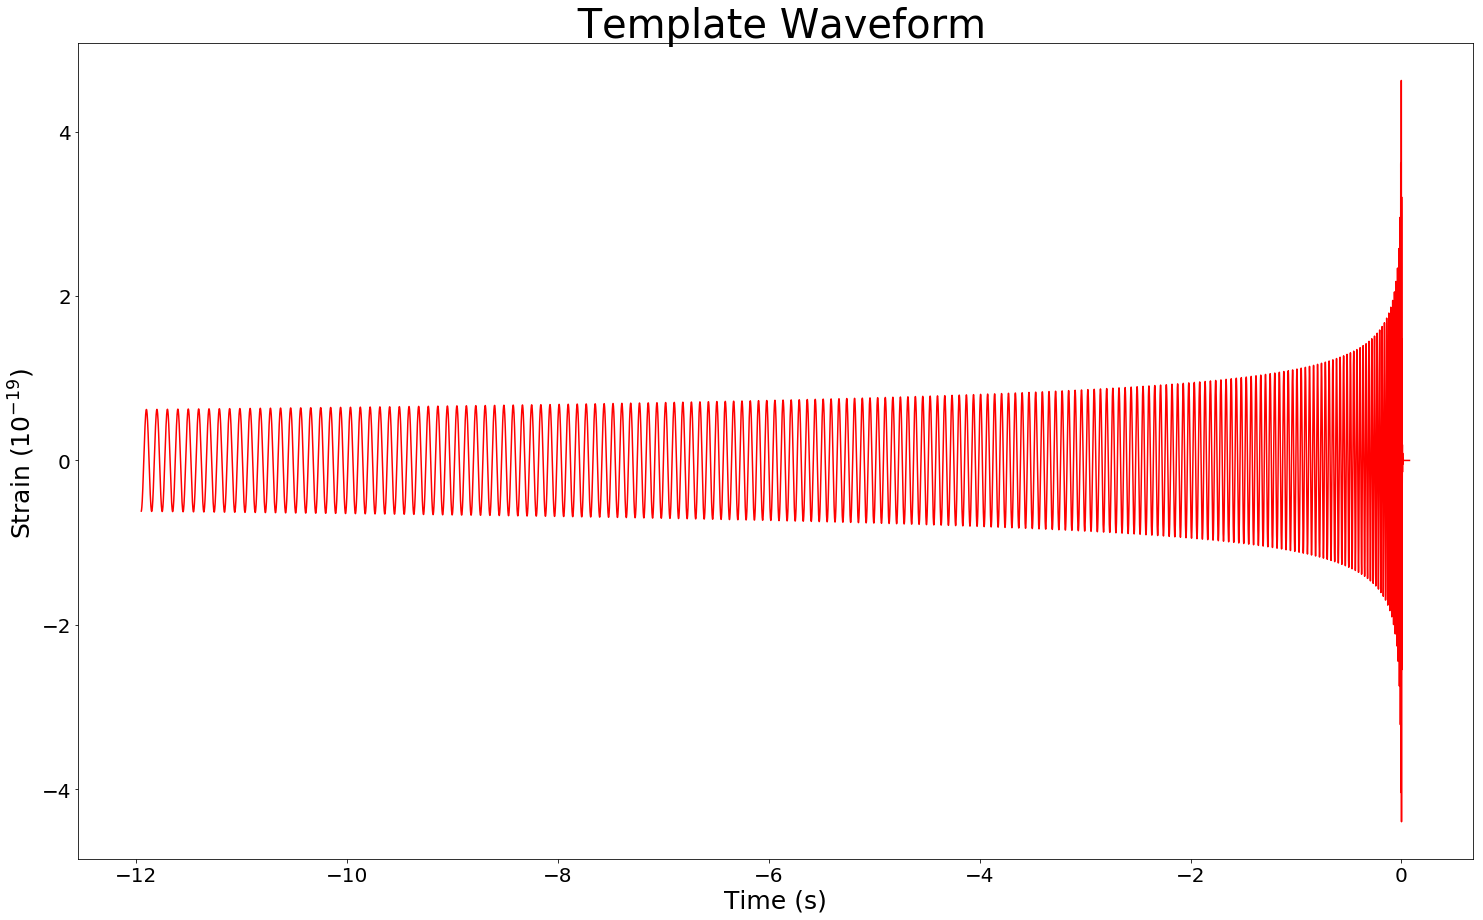

In [28]:
reference=pd.read_csv('reference_Mtot40Msun_Dist1Mpc.csv')    #First we load the reference waveform file data 
referencetime=reference['time (s)']                            #reference time
referencestrain=reference['strain']                            #reference strain

fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(referencetime,referencestrain*10**(19),color='red')

ax.set_xlabel('Time (s)',size=25)
ax.set_ylabel(r'Strain $(10^{-19}$) ',size=25)
ax.set_title(' Template Waveform',size=40)
plt.xticks(size = 20)
plt.yticks(size = 20)


def scalingfunction(distance,mass):     # Our function will take as an input the values of distance and mass
    refmass=40
    refdistance=1
    
    h=(mass/refmass)*(refdistance/distance)
    t=(mass/refmass)
    return(t,h)



# C.2) 

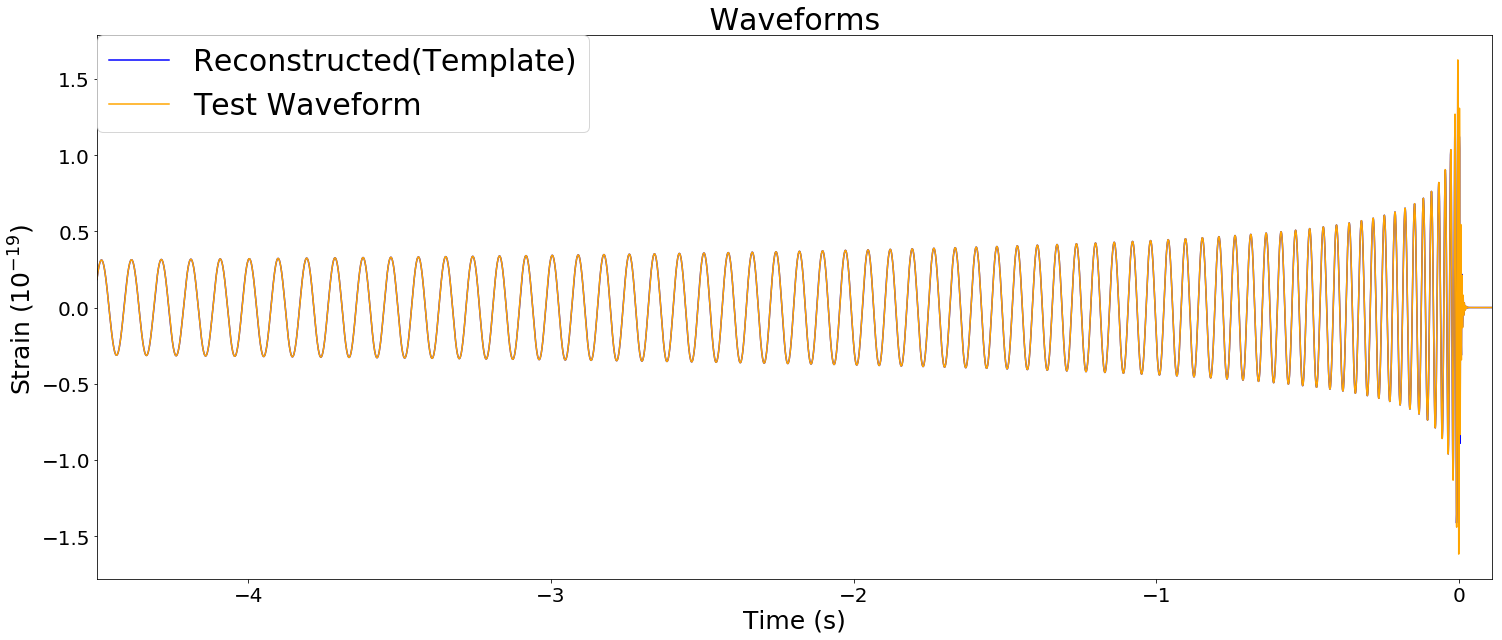

In [30]:
data3=pd.read_csv('reference_Mtot70Msun_Dist5Mpc.csv')   #first we load the data 
time70=(data3['time (s)'])                            # time
strain70=(data3['strain'])                            #strain 


scaletime,scalestrain=scalingfunction(distance=5,mass=70)      #we call our functin using M=70 and D=5 

fig, ax = plt.subplots(figsize=(25, 10))


ax.set_xlim([-4.50, 0.11])
ax.plot(referencetime*scaletime,referencestrain*scalestrain*10**(19),color='blue',label='Reconstructed(Template)')    #testing our function
ax.plot(time70,strain70*10**(19),color='orange',label='Test Waveform')
ax.set_xlabel('Time (s)',size=25)
ax.set_ylabel(r'Strain $(10^{-19}$) ',size=25)
ax.set_title(' Waveforms ',size=30)
ax.legend(loc='upper left', borderaxespad=0.,fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()



 **We can see from the plot above that our interpolation function works.It is not a perfect overlap because template waveform are created from mathematical periodic funcions and test waveform are created from real data.**

# C.3) 

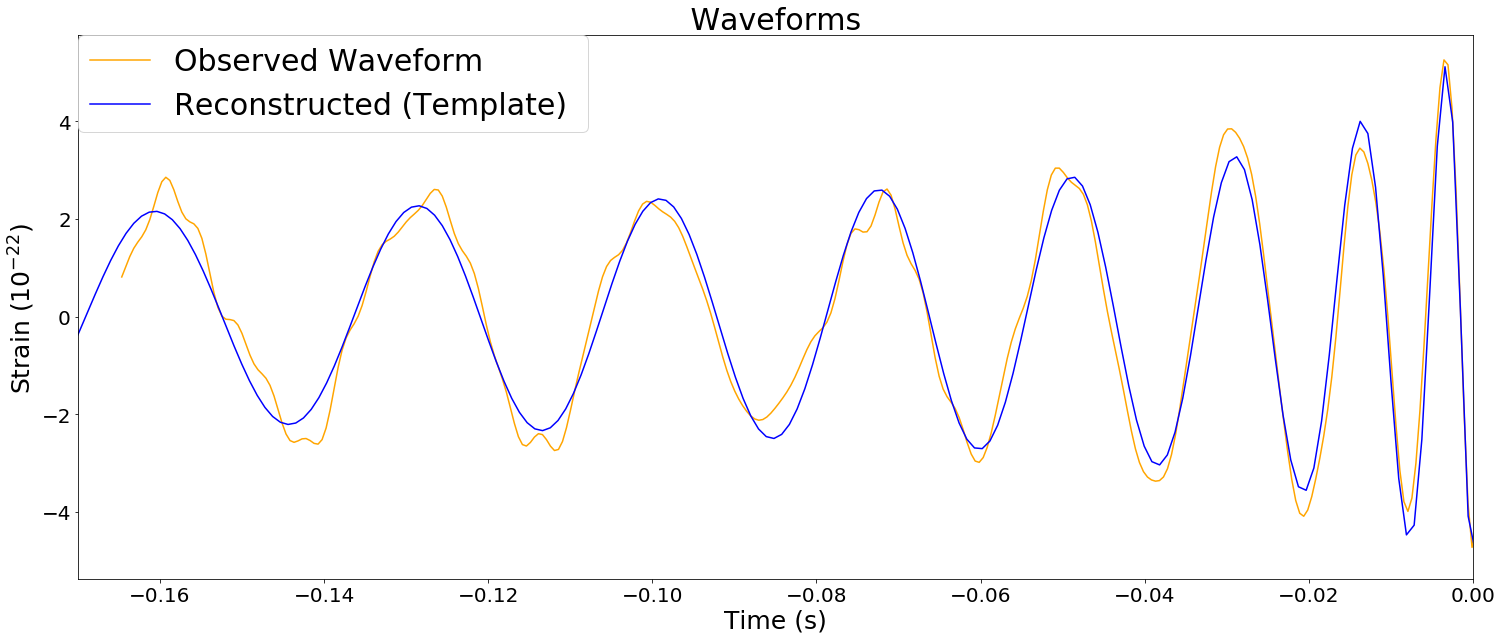

In [36]:
scaletime,scalestrain=scalingfunction(distance=1740,mass=77.0)      #we call our functin using M=77 and D=1740 

fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(timeobserved,strainobserved*10**(22),color='orange',label='Observed Waveform')  
ax.plot(referencetime*scaletime,referencestrain*scalestrain*10**(22),color='blue',label='Reconstructed (Template) ')
plt.xticks(size = 20)
plt.yticks(size = 20)
ax.set_xlabel('Time (s)',size=25)
ax.set_ylabel(r'Strain $(10^{-22}$)' ,size=25)
ax.set_title(' Waveforms ',size=30)
ax.legend(loc='upper left', borderaxespad=0.,fontsize=30)

ax.set_xlim([-0.17, 0])                                                                  #for focusing and make it easier to find "by eye"

plt.show()

**For a better "by eye estimate" we have limited the x-axis (time) for times t ≤0  (before the merger)** 

In [37]:
print('Our initial rough estimate "by eye" will be is 77 Msun and 1740 Mpc') 

Our initial rough estimate "by eye" will be is 77 Msun and 1740 Mpc


## Part D - Get data and model to have the same x values. 

Now that we have our observed data, and can scale the template data to any mass and distance, we need to do one more fix.  Currently our data and our templates have different sampling on the $x$ axis - ie they have different values of $x$ (time(.  We need to try and match the $x$ times up so that for each value of $x$ we can compare the $y$ values (the observed strain with the strain from the scaled template).  

We need to only consider the times when we have observed data, so we will trim our data set.

1.  Our data waveform starts at some time $t_{\rm min}$. Find out what this is.  Next, take your observed data waveform and output data for $t$ > $t_{\rm min}$ and $t$ < $0$ (ie only keep information for times $\le 0$ (before the merger), or for times where there is data).  Verify, by plotting, that your new observed waveform only has data in this restricted time range. <div align="right">**[5 marks]**</div><br>

2. We now need to put both observed and template waveforms on the same time sampling, ie the same number of data points.  The model waveforms have approx 20,000+ time steps, yet the data has less than hundreds in the time range specified!  

We need to interpolate between our observed data and the template. To do this use the following code:

(assuming `x[index]` and `y[index]` are the observed data from Part D.1 and scaled template time is your scaled reference template to your suggested values of $M$ and $D$ from Part C3.)

```
from scipy.interpolate import interp1d

# get interpolation object using data
interp_fn =interp1d(x[index],y[index],bounds_error=False)

# now get scaled template and get the strains for the same x axis as data
interp_strain = interp_fn(scaled_template_time)

#plot
plt.plot(scaled_template_time,interp_strain)
```

Briefly verify that this works. <div align="right">**[5 marks]**</div>

*Hints:*
 * *One can use the following code example  `index = np.where((data > 5)&(data < 10))[0]`. This type of statement returns a list of indices (`index`) where the conditions in the bracket have been met.  `data_[index]` pulls out `data` that satisfy the conditions in the brackets above.*

# **Answer**

# D.1)

The minimum value of the time,tmin, of the OBSEVED data takes the value -0.165  and  it is located in the index array position 0
The maximum value of the time,tmax, of the OBSERVED data takes the value -0.000  and  it is located in the index array position 337


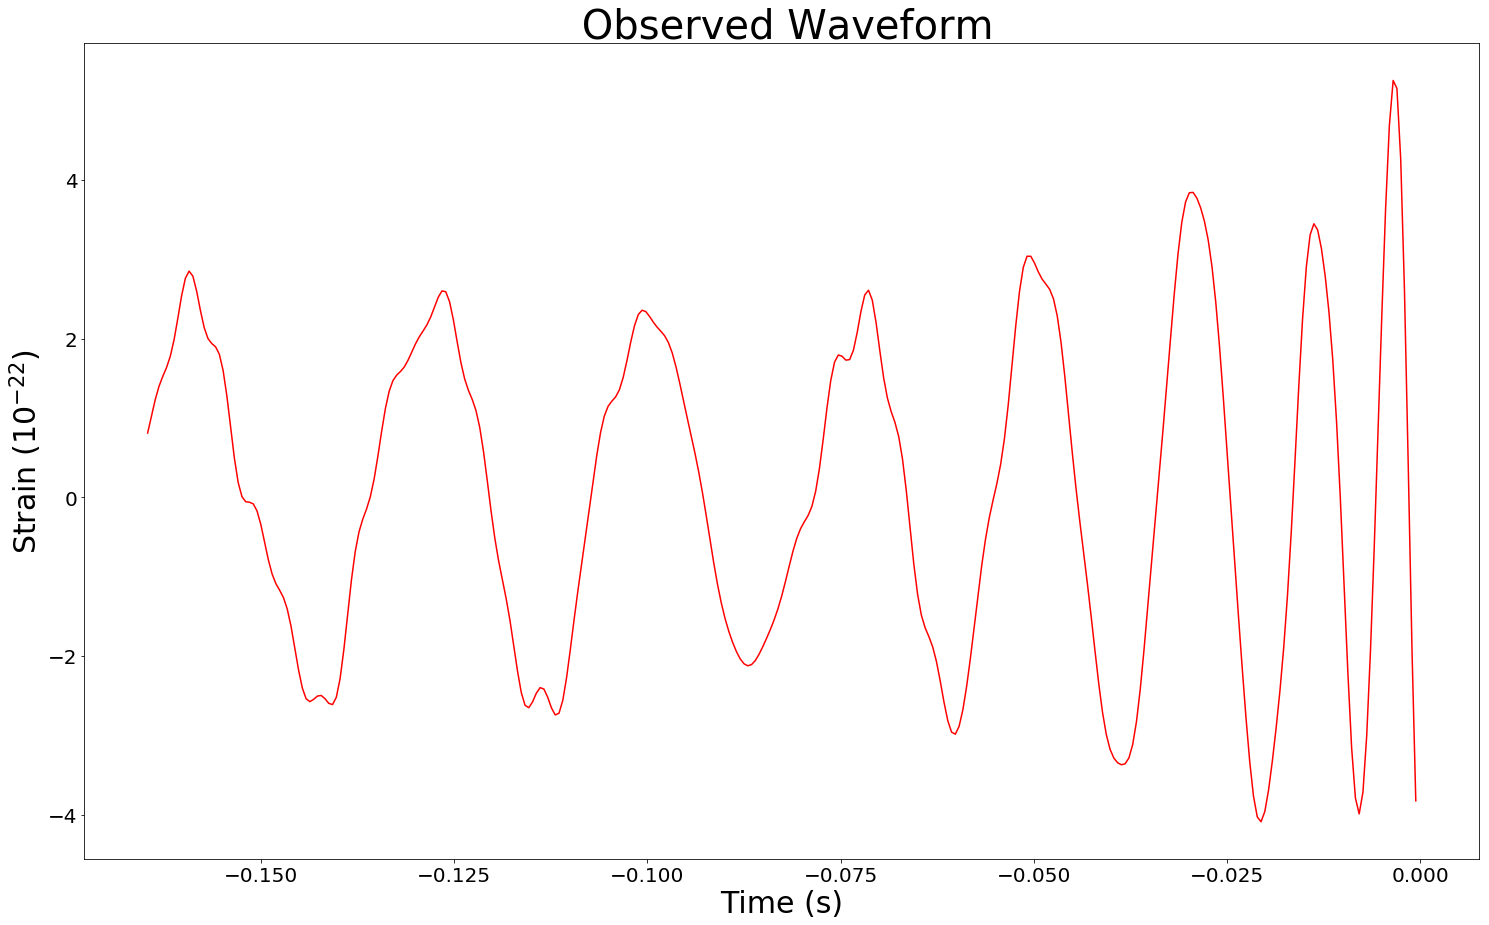

In [40]:
#First,We need to find the index position and the value of tmin and tmax in our OBSERVED dataset

tmaxmaxindex=(np.where(timeobserved<=0)[0])[-1]       #lets find wich is nearest value to 0, taking into account that tmax<0 
tmaxvalue=timeobserved[tmaxmaxindex] 

tminindex=0                    #Since we know that the array is increiasing monotonic,the index will be the last value,i.e max value of the arary
tminvalue=np.min(timeobserved)                            
        
adjustedobservedtime=timeobserved[tminindex:tmaxmaxindex]
adjustedobservedstrain=strainobserved[tminindex:tmaxmaxindex]

print('The minimum value of the time,tmin, of the OBSEVED data takes the value {:.3f}'.format(tminvalue)+'  and  it is located in the index array position {:.0f}'.format(tminindex)+'')



print('The maximum value of the time,tmax, of the OBSERVED data takes the value {:.3f}'.format(tmaxvalue)+'  and  it is located in the index array position {:.0f}'.format(tmaxmaxindex)+'')



scaletime,scalestrain=scalingfunction(distance=1740,mass=77)     #we call our functin using M=21 and D=450 from part C.3




#lets plot the restricted waveform

fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(adjustedobservedtime,adjustedobservedstrain*10**(22),color='red')
plt.xticks(size = 20)
plt.yticks(size = 20)
ax.set_xlabel('Time (s)',size=30)
ax.set_ylabel(r'Strain $(10^{-22}$)',size=30)
ax.set_title(' Observed Waveform',size=40)
plt.show()

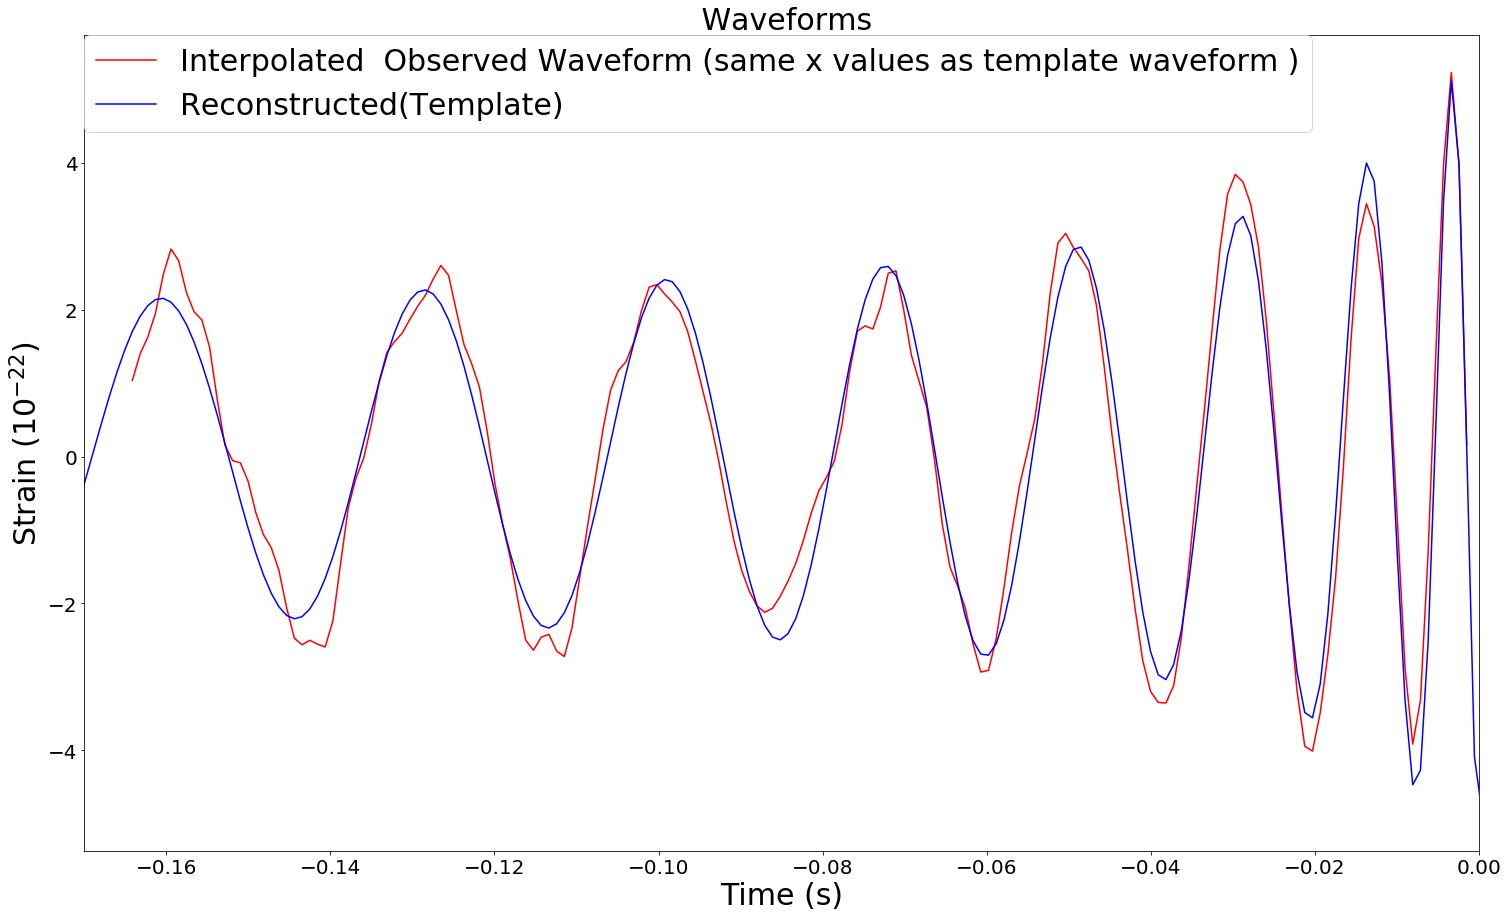

In [75]:
scaletime,scalestrain=scalingfunction(distance=1740,mass=77)#we will use the scale factor  from C.3(M=77 and D=1740) 

from scipy.interpolate import interp1d

# get interpolation object using data
interp_fn =interp1d(adjustedobservedtime,adjustedobservedstrain,bounds_error=False)

# now get scaled template and get the strains for the same x axis as data

interp_strain = interp_fn(referencetime*scaletime)

#plot
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(referencetime*scaletime,interp_strain*10**(22),color='red',label='Interpolated  Observed Waveform (same x values as template waveform )')
ax.plot(referencetime*scaletime,referencestrain*scalestrain*10**(22),color='blue',label='Reconstructed(Template)')
plt.xticks(size = 20)
plt.yticks(size = 20)
ax.set_xlim([-0.17, 0])       
ax.legend(loc='upper left', borderaxespad=0.,fontsize=30)
ax.set_xlabel('Time (s)',size=30)
ax.set_ylabel(r'Strain $(10^{-22}$)',size=30)
ax.set_title(' Waveforms',size=30)

plt.show()


## Part E - Estimating the best fit total mass using MCMC 

Now that we know how to make the scaled template (ie 40Msun,1Mpc template file) and the observed data have the same time sampling, we can use MCMC to find out the total mass of the system that made the data we see.  

You can assume the "by-eye" estimate of the distance above.

Think carefully about what the likelihood function will be in this case (see Chapters 6-9).  

1. Use MCMC to sample the total mass, $M$, to produce a best-fit value for your data.  <div align="right">**[20 marks]**</div> <br>

2.  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC. <div align="right">**[15 marks]**</div> <br>

3. Report the median and 90% credible limits on your value of $M$.  <div align="right">**[10 marks]**</div> <br>
 
You may assume that:
- the noise is described by a Gaussian distribution, 
- the total mass of the system is in the range [20,100] $M_{sun}$.
 
_Hints:_

 * _Think very carefully about the form of your likelihood since here we are comparing observed data with a model_
 
 * _You should work with "log(Likelihood)" to avoid numerical errors  - note this will affect both your posterior and the step in the MCMC chain where we usually write $p_{\rm proposed}/p_{\rm current}$_

 * _The step size between samples of the MCMC is quite important. A suggested value is $0.1\,M_{sun}$_
 
 * _The initial guess of your mass is also very important. You may find yourself getting into a local minimum rather than your code finding the true minimum._
 
 * _Test your MCMC on a small number of samples (e.g. 10-100) before trying it with a larger number (e.g. $10^5$ or $10^6$)_
 
 * _At the end, ask yourself if you need to include every sample?_
 
 * _Depending on your step size, this part can take a long time to run. Suggest that you move all your plotting routines to a different code cell to save you re-running everything 10000s of times when you just want to change a plot command._
 
 * _To find out how long it will take for a Jupyter notebook to compile the MCMC code cell, add the following snippet to your code before you go into your MCMC loop (where Nsteps is the number of steps your MCMC is using):_
 
```def time_spent_waiting(n):
    from datetime import datetime,timedelta
    preddur=[n*0.01,n*0.02]
    print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
    return```

# **Answer:**

In this secion we are gonna fit the model  to the data using Bayes Theorem
First We need to think about the "log Likelihood".
We are gonna assume that the noise is described by a Gaussian distribution,this means that the noise, $\epsilon$ ,can be described by the following distribtuion: $\quad \varepsilon_n\sim N(0,\sigma^2)$
$$ p(\epsilon_n) = \frac{1}{\sigma_{noise}\sqrt{2\pi}}e^{-\frac{\epsilon_{n}^2}{2 \sigma_{noise}^2}} $$



The log Likelihood formula that we are gonna use is the chi-sq function ,given by:

 $Log(L(d|\theta))=\chi^2 = -0.5 \dfrac{\sum(y_i-y_{\rm model})}{\sigma^2}$

Using Bayes theorem, the log posterior distribution is given by:

$ Log(p(\theta|d)) =\frac{\chi^2 Log(\pi(\theta))}{Z}$

Where Z is a normazilation constant that we can ommit(when comparing different log posterior, Z makes no difference).

For the prior distribution.Firstly,we have tried with a uniform distribution.However,we have obtain better result using a normal distribution centered in 21 solar masses and 1 as a standar deviation.

For the stepsize we will be using 0.01 Solar Masses(the suggested value for the stepsize of 0.1 solar masses makes  MCMC  stucks in local minimum and misses the true chi-square minima.)

We are not going to include every sample. We will choose a burn-in period od 1000 steps(for both E and F questions).


# E.1)

In [85]:
from scipy.stats import norm
######################Calculate time function code ###########################################
def time_spent_waiting(n):
    from datetime import datetime,timedelta
    preddur=[n*0.01,n*0.02]
    print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
    return

######################Calculate loglikelihoodfunction code ###########################################




######################Posterior function code ###########################################

def posterior(mass):                         
    D=1740                                    #We only want to estimate mass, distance is fixed D=1740Mpc from question C.3
                                    #From question B3
    meandata=np.mean(adjustedobservedstrain)
    ftime,fstrain=scalingfunction(D,mass)                        #We use the scaling funcion from question C.1
    interp_fn =interp1d(adjustedobservedtime,adjustedobservedstrain,bounds_error=False)
    ip_observedstrain = interp_fn(referencetime*ftime)                             #Interpolate observed strain
   
    #Test strain,matching x values where data can be seen 
    teststrain=referencestrain*fstrain  
    teststrain=teststrain[(ip_observedstrain < 1000000000)]
    
    #Real observed data without NaN values.
    ip_observedstrainnonan=ip_observedstrain[(ip_observedstrain < 1000000000)]
    mu_0=np.mean(ip_observedstrainnonan)
    s_0=np.std(ip_observedstrainnonan)     
    LLV=-0.5*(((np.sum((ip_observedstrainnonan-teststrain)**2.)))/(sde**2))       #LOG POSTERIOR FUNCTION =log likelihood*log prior
    LLVFINAL= LLV +np.log(norm.pdf(mass,77,1))
    return(LLVFINAL)

######################Posterior function code ###########################################



######################MCMC Code ###########################################

def MCMC(initialMass,MaxIterations,burnin,thinning):   #3 INputs
    time_spent_waiting(MaxIterations)           #For finding the time it takes to run the code
    theta_current = np.zeros(MaxIterations+1)   #sample array
    
    theta_current[0] = initialMass   # use our prior as a guess
    stepsize=0.01                     #suggested step by the question
    for i in range(MaxIterations):
        
        p_current = posterior(theta_current[i]) # put in posterior equations
        dtheta = np.random.normal(0,stepsize) # randomally draw a value of theta to trial
        theta_proposed = theta_current[i] + dtheta #get new theta
        if (theta_proposed<20 or theta_proposed>100):     # to be sure we stick to the mass range of the system given by the question
            theta_proposed=theta_current[i]   #If it get outs of the range then use same value for theta_proposed
        p_proposed = posterior(theta_proposed)

        if p_proposed > p_current: 
            theta_current[i+1] = theta_proposed
        else:
        # if probability lower
        # use the ratios of probability to define probability of the move
            p_new_move = p_proposed/p_current
            # generate random number for probability
            u_random = np.random.uniform(0,1)
            # if u_random < p_new_move, then accept, if not, reject
            if u_random <= p_new_move:
                theta_current[i+1] = theta_proposed
            else:
                theta_current[i+1] = theta_current[i]

    mean_mcmc=np.mean(theta_current)    #Find mean for generated samples
    std_mcmc=np.std(theta_current)      #Find st for gerenerated samples
    burnt_theta_current = theta_current[burnin:]    #We dont need to include every sample,we will delete the first steps
    thinning_theta_current=theta_current[::thinning]
    return(theta_current,burnt_theta_current,thinning_theta_current)


 ######################MCMC Code ###########################################

In [87]:
   
MaxIterations=10000    #MaxIterations=100000 as proposed in the question
initialMass=77          #initialmass=77 We will chose this value from part C.3
burnin=1000              #We will bur in in the first 1000 steps
thinning=100            #thinning lenght
resultsMCMC1,burntresultsMCMC1,thinningresultsMCMC1=MCMC(initialMass,MaxIterations,burnin,thinning)
print('MCMC analysis displays a result of  M={:.2f}  solar masses)'.format(resultsMCMC1[-1])) 

predicted duration: 1.67-3.33 mins


C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


MCMC analysis displays a result of  M=78.58  solar masses)


# E.2)

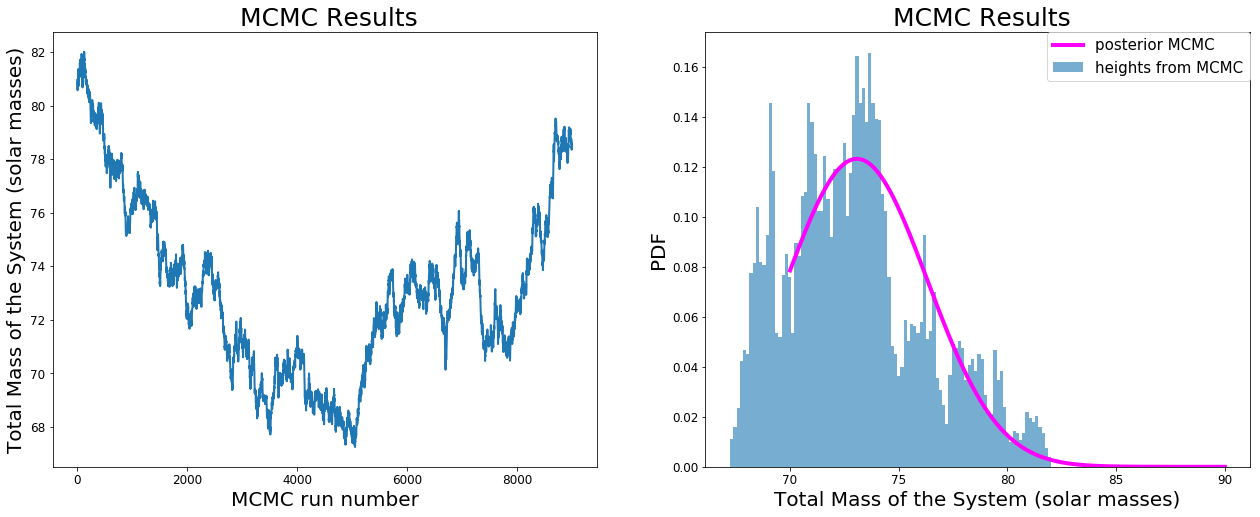

In [88]:
from scipy.stats import norm
####Lets Display the results in an appropriate manner and realize testing for convergence  ####
MCMC_tries = np.linspace(0,(MaxIterations-burnin),(MaxIterations+1-burnin))     # generate x for plotting



plt.figure(figsize=(7,8))
plt.subplot(121)

plt.plot(MCMC_tries, burntresultsMCMC1, label='C=15', linewidth=2)


plt.title(' MCMC Results',size=25)
plt.xlabel('MCMC run number',size=20)
plt.ylabel('Total Mass of the System (solar masses)',size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.subplot(122)
x = np.linspace(70,90,1000)
posterior_mcmc=norm.pdf(x,np.mean(burntresultsMCMC1),np.std(burntresultsMCMC1))

plt.hist(burntresultsMCMC1,bins=100,density=True,label='heights from MCMC',alpha=0.6)
plt.plot(x,posterior_mcmc,label = 'posterior MCMC',c='magenta',lw=4)
plt.legend(loc='upper left')
plt.title(' MCMC Results',size=25)
plt.xlabel('Total Mass of the System (solar masses)',size=20)
plt.ylabel('PDF',size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend(loc='upper right', borderaxespad=0.,fontsize=15)
plt.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)




#### Comment: Firstly,I used the suggested value of 0.1 solar masses  for the stepszie . However, I observed that results of the MCMC were much more effective using  a smaller value such as 0.01 solar masses.

predicted duration: 1.67-3.33 mins


C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


predicted duration: 1.67-3.33 mins
predicted duration: 1.67-3.33 mins
predicted duration: 1.67-3.33 mins
predicted duration: 1.67-3.33 mins


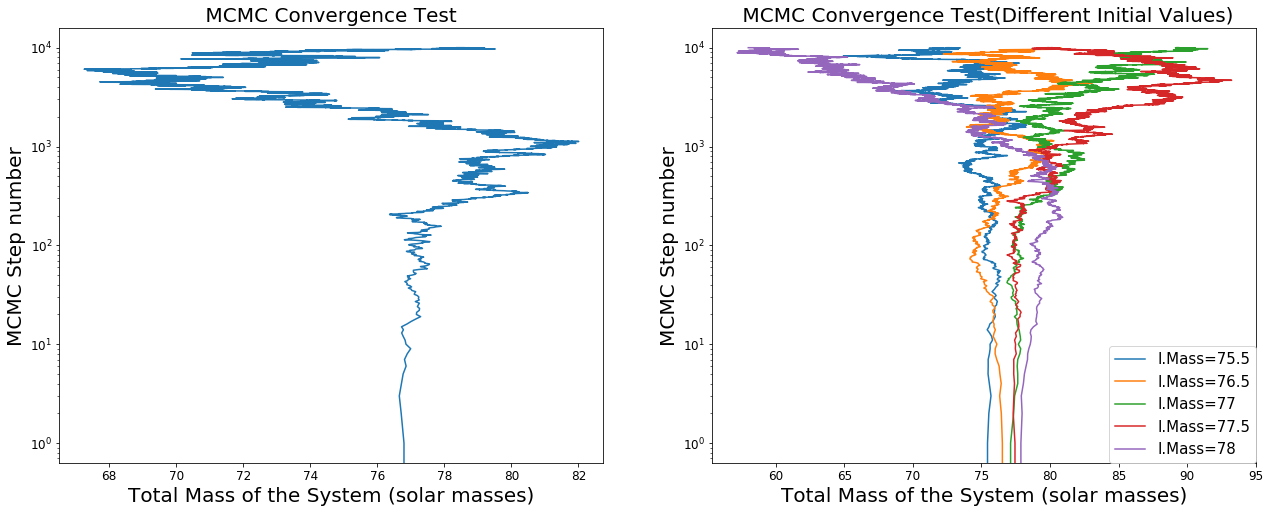

In [89]:

# let's generate the walk for plotting
MCMC_tries = np.linspace(0,(MaxIterations),(MaxIterations+1))     # generate x for plotting
plt.figure(figsize=(7,8))
plt.subplot(121)
plt.title(' MCMC Convergence Test ',size=20)
plt.xlabel('Total Mass of the System (solar masses)',size=20)
plt.ylabel('MCMC Step number',size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.semilogy(resultsMCMC1,MCMC_tries)

#lETS GENERATE 5 DIFFERENT MCMC VALUES FOR 5 DIFFERENT INITIAL MASS CONDITIONS

MaxIterationss=10000       #Since we will create multiple MCMC chains,we will choose a smaller number of iterations than before for testint covergence                
burnin=100
thinning=10
Initialvalues=[75.5,76.5,77,77.5,78]              #We will try for 5 different mass values
MCMC_triess = np.linspace(0,(MaxIterationss),(MaxIterationss+1))     # generate x for plotting,We wont use the burn-in sample values for this test

results1,burntresults1,thinningresults1=MCMC(Initialvalues[0],MaxIterationss,burnin,thinning)
results2,burntresults2,thinningresults2=MCMC(Initialvalues[1],MaxIterationss,burnin,thinning)
results3,burntresults3,thinningresults3=MCMC(Initialvalues[2],MaxIterationss,burnin,thinning)
results4,burntresults4,thinningresults4=MCMC(Initialvalues[3],MaxIterationss,burnin,thinning)
results5,burntresults5,thinningresults5=MCMC(Initialvalues[4],MaxIterationss,burnin,thinning)


plt.subplot(122)
plt.semilogy(results1,MCMC_triess,label = 'I.Mass=75.5')
plt.semilogy(results2,MCMC_triess,label = 'I.Mass=76.5')
plt.semilogy(results3,MCMC_triess,label = 'I.Mass=77')
plt.semilogy(results4,MCMC_triess,label = 'I.Mass=77.5')
plt.semilogy(results5,MCMC_triess,label = 'I.Mass=78')
plt.title(' MCMC Convergence Test(Different Initial Values)',size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Total Mass of the System (solar masses)',size=20)
plt.ylabel('MCMC Step number',size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend(loc='lower right', borderaxespad=0.,fontsize=15)
plt.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)
plt.show()

**Coment: We can see from the plots above that the MCMC is converging correctly.Different initial values leads to the same  results. However, for initial values of more than 21 solar Masses MCMC find a local minimum around 23.5 This is not te true chi-square minima.**

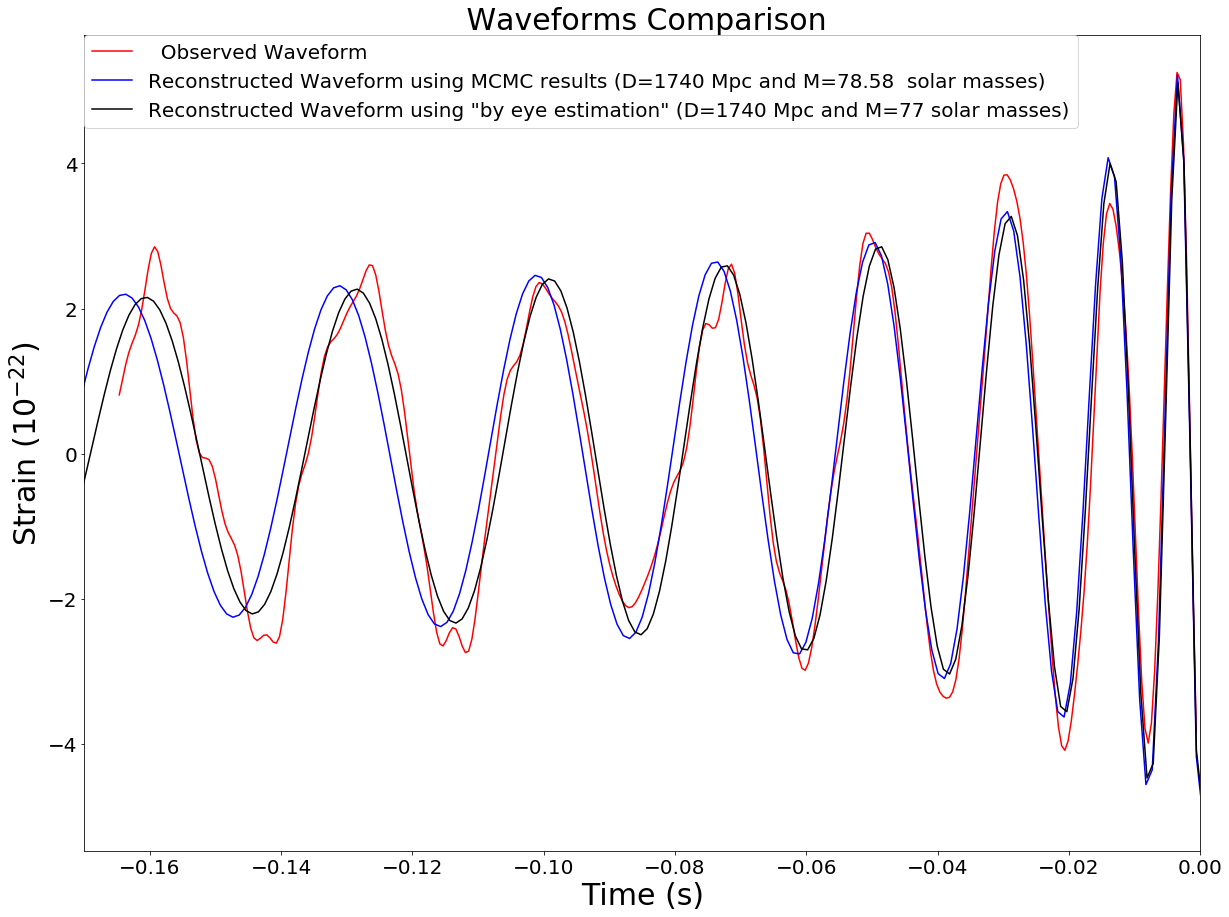

In [90]:
plt.figure(figsize=(20,15))
plt.plot(adjustedobservedtime,adjustedobservedstrain*(10**22),color='red',label='  Observed Waveform ')
ftimeMCMC1,fstrainMCMC1=scalingfunction(1740,resultsMCMC1[-1]) 
ftimebyeye,fstrainbyeye=scalingfunction(1740,77)  
plt.plot(referencetime*ftimeMCMC1,referencestrain*fstrainMCMC1*(10**22) ,color='blue',label='Reconstructed Waveform using MCMC results (D=1740 Mpc and M={:.2f}  solar masses)'.format(resultsMCMC1[-1]))
plt.plot(referencetime*ftimebyeye,referencestrain*fstrainbyeye*(10**22) ,color='black',label='Reconstructed Waveform using "by eye estimation" (D=1740 Mpc and M=77 solar masses)')

plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlim([-0.17, 0])       
plt.legend(loc='upper left', borderaxespad=0.,fontsize=20)
plt.xlabel('Time (s)',size=30)
plt.ylabel(r'Strain $(10^{-22}$)',size=30)
plt.title(' Waveforms Comparison',size=30)

plt.show()


**Results from MCMC estimation are similar to those of the "by eye estimation".However, we can see that they overlap a little better to the data.**

# E.3)

In [91]:
import scipy.stats
median=np.median(burntresultsMCMC1)   #We will consider the "burn in" results(i.e we will 
print('The median of Mass from the MCMC is {:.2f} solar mases'.format(median))
#We will use scipy in order to calculate the confidence interval:

def mean_confidence_interval(data, confidence=0.90):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m,h

val,inc=mean_confidence_interval(burntresultsMCMC1, confidence=0.90)
print('The 90% credible limits of the Total Mass of the System  from the MCMC is {:.2f}'.format(median)+' +- {:.2f}'.format(inc))

The median of Mass from the MCMC is 72.85 solar mases
The 90% credible limits of the Total Mass of the System  from the MCMC is 72.85 +- 0.06


## Part F - Estimating mass *and distance* using MCMC for the merging system 

If you run into any difficulties completing this component of the coursework, you can still attempt Part G using either your by-eye estimates for $M$ and $D$ from Part C, or your $M$ from the MCMC from Part E and your by eye estimate for $D$ in Part C.

1. Repeat your MCMC analysis to now estimate the total mass, $𝑀$, *and* the distance, $𝐷$ at the same time.   <div align="right">**[15 marks]**</div><br>

2.  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC. <div align="right">**[10 marks]**</div><br>

3.  Report the median and 90% credible limits on your value of $M$ and compare your best fit waveform with the data. Comment on your result.  <div align="right">**[15 marks]**</div>
 

_Hints:_
 * *Now your theta_current for the MCMC will have 2 values (Mtot and D) as such you will need to specify 2 initial parameters for theta_current. Whereas before you may have used something like `theta_current.append([Mtot_guess])`, now you will need something like `theta_current.append(np.array([Mtot_guess,D_guess]))` and similarly your `D_theta` will need to have 2 values to tell the MCMC to take a random step in both Mtot and D values in each step of the MCMC.*
 * *Be careful not to get caught up in messy arrays - if in doubt run the MCMC for 5-10 steps and print out the theta_current to check everything ends up looking like it should.*

# F.1)

We will be using the same code from E. However,In this case we are working with two parameters,so the prior has to reflect that.Thus,now we need to multply the normal distribution from both distance and mass( each of the distribution will be centered on the by eye estimation values,i.e M=21 solar masses and D=450Mp).

In [99]:
######################Calculate time function code ###########################################
def time_spent_waiting(n):
    from datetime import datetime,timedelta
    preddur=[n*0.01,n*0.02]
    print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
    return

######################Calculate time function code ###########################################






######################Posterior function code ###########################################
#Now the posterior takes as an input the array of parameters(Mass an Distance) instead of only the Mass
def posterior_2(parameters):               
    ftime,fstrain=scalingfunction(parameters['Distance'],parameters['Mass'])                        #We use the scaling funcion from question C.1
                            
  
    interp_fn =interp1d(adjustedobservedtime,adjustedobservedstrain,bounds_error=False)
    ip_observedstrain = interp_fn(referencetime*ftime)                             #Interpolate observed strain
   
    #Test strain,matching x values where data can be seen 
    teststrain=referencestrain*fstrain  
    teststrain=teststrain[(ip_observedstrain < 1000000000)]
    
    #Real observed data without NaN values.
    ip_observedstrainnonan=ip_observedstrain[(ip_observedstrain < 1000000000)]
    mu_0=np.mean(ip_observedstrainnonan)
    s_0=np.std(ip_observedstrainnonan) 

    LLV=(-0.5*((np.sum(ip_observedstrainnonan-teststrain)))/(sde**2)) + (np.log(norm.pdf(parameters['Mass'],77,1)))+(np.log(norm.pdf(parameters['Distance'],1740,1)))             #LOG POSTERIOR FUNCTION =log likelihood*log prior
    return(LLV)

    
    
    

    

######################Posterior function code ###########################################









######################MCMC Code ###########################################

def MCMC_2(initialMass,initialDistance,MaxIterations,burnin,thinning):   #3 INputs
    time_spent_waiting(MaxIterations)           #For finding the time it takes to run the code
    
    
    a = np.zeros(shape=(MaxIterations+1,2))  #Matrix of 2xMaxIterations all fill with zeros
    theta_current= pd.DataFrame(a,columns=['Mass','Distance',])  #We will be working in this MCMC with dataframe as theta_current in order the colums by its name
    
    
    theta_current['Mass'][0] = initialMass   # use our previus MCMC result as a guess for the Mass
    theta_current['Distance'][0] = initialDistance   # use our previus MCMC result as a guess for the Mass
    stepsizemass=0.1                     #suggested mass step by the question
    stepsizedistance=1                  #Distance should be in the range [100,600]

    for i in range(MaxIterations):
        p_current = posterior_2(theta_current.iloc[i,]) # put in posterior equations
        dtheta = [np.random.normal(0,stepsizemass),np.random.normal(0,stepsizedistance)] # randomally draw a value of theta to trial for both mass and disttance
        theta_proposed = theta_current.iloc[i,] + dtheta #get new theta
        
        if ((theta_proposed['Mass']) <20 or (theta_proposed['Mass'])>100):     # to be sure we stick to the mass range of the system given by the question
            theta_proposed=theta_current.iloc[i-1,]   #If it get outs of the range then use same value for theta_proposed
        p_proposed = posterior_2(theta_proposed)

        if p_proposed > p_current: 
            theta_current.iloc[i+1,] = theta_proposed
        else:
        # if probability lower
        # use the ratios of probability to define probability of the move
            p_new_move = p_proposed/p_current
            # generate random number for probability
            u_random = np.random.uniform(0,1)
            # if u_random < p_new_move, then accept, if not, reject
            if u_random <= p_new_move:
                theta_current.iloc[i+1,] = theta_proposed
            else:
                theta_current.iloc[i+1,] = theta_current.iloc[i,]

    burnt_theta_current =theta_current.iloc[burnin:]    #We dont need to include every sample,we will delete the first steps
    thinning_theta_current=theta_current.iloc[:,::thinning]

    return(theta_current,burnt_theta_current,thinning_theta_current)


 ######################MCMC Code ###########################################

In [105]:
MaxIterations=10000     #MaxIterations=100000 as proposed in the question
initialMass=77          #initialmass=21 solar masses. We will chose this value from part E(MCMC single parameter estimation)
InitialDistance=1740     #Initial distance=450 Mpc we will use this value from part C.3( by eye estimation)
burnin=100              #We will bur in in the first 1000 steps
thinning=100            #thinning lenght
resultsMCMC2,burntresultsMCMC2,thinningresultsMCMC2=MCMC_2(initialMass,InitialDistance,MaxIterations,burnin,thinning)

print('MCMC analysis displays a result of D={:.2f}'.format((burntresultsMCMC2['Distance']).iloc[-1]) +' Mpc and M={:.2f}'.format((burntresultsMCMC2['Mass']).iloc[-1])+' solar masses)') 

predicted duration: 1.67-3.33 mins


C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less
C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in double_scalars


MCMC analysis displays a result of D=1752.84 Mpc and M=84.98 solar masses)


# F.2)

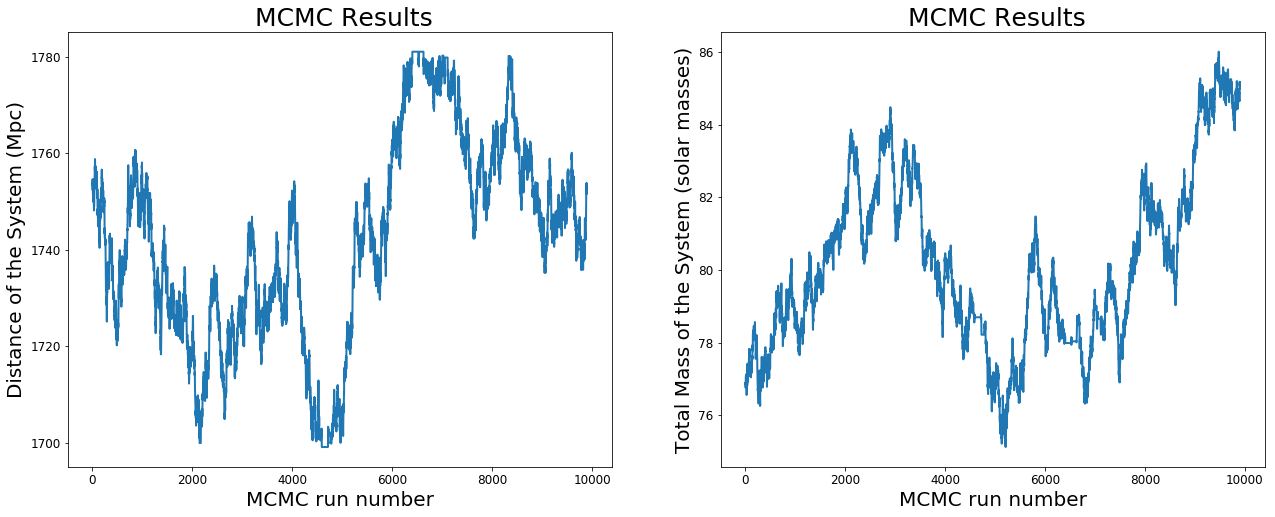

In [106]:
from scipy.stats import norm
####Lets Display the results in an appropriate manner and realize testing for convergence  ####
MCMC_tries = np.linspace(0,(MaxIterations-burnin),(MaxIterations+1-burnin))     # generate x for plotting



plt.figure(figsize=(7,8))
plt.subplot(121)

plt.plot(MCMC_tries, burntresultsMCMC2['Distance'], label='C=15', linewidth=2)


plt.title(' MCMC Results',size=25)
plt.xlabel('MCMC run number',size=20)
plt.ylabel('Distance of the System (Mpc)',size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.subplot(122)
plt.plot(MCMC_tries, burntresultsMCMC2['Mass'], label='C=15', linewidth=2)


plt.title(' MCMC Results',size=25)
plt.xlabel('MCMC run number',size=20)
plt.ylabel('Total Mass of the System (solar masses)',size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)



**MCMC cant not find a minimum for the distance.However,for the mass MCMC is is converging correctly.**


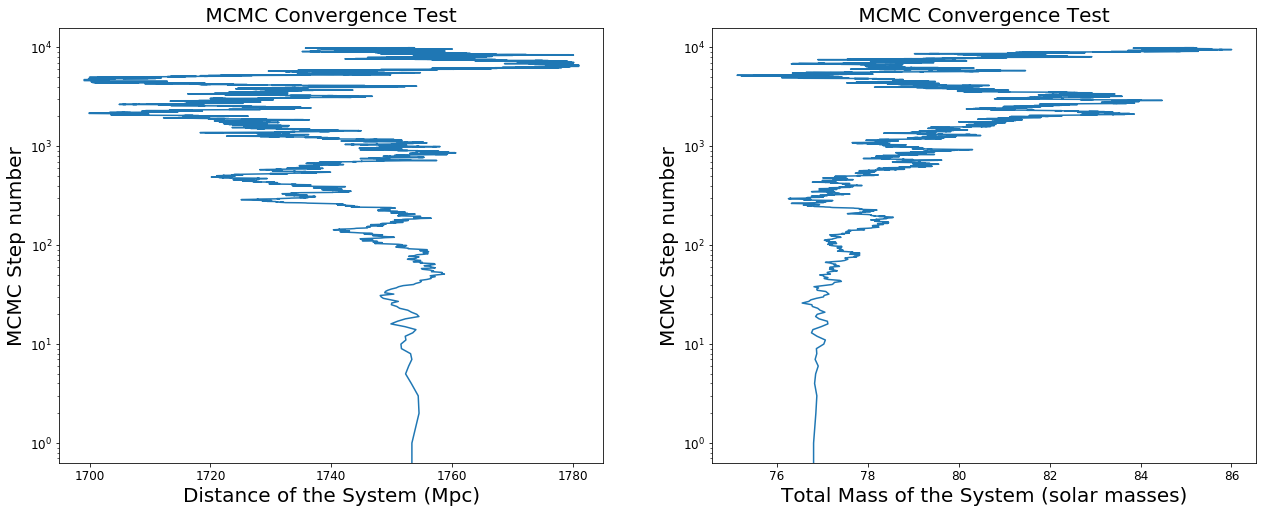

In [107]:
plt.figure(figsize=(7,8))
plt.subplot(121)
plt.title(' MCMC Convergence Test ',size=20)
plt.xlabel('Distance of the System (Mpc)',size=20)
plt.ylabel('MCMC Step number',size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.semilogy(burntresultsMCMC2['Distance'],MCMC_tries)


plt.subplot(122)
plt.title(' MCMC Convergence Test ',size=20)
plt.xlabel('Total Mass of the System (solar masses)',size=20)
plt.ylabel('MCMC Step number',size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.semilogy(burntresultsMCMC2['Mass'],MCMC_tries)
plt.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)


predicted duration: 0.17-0.33 mins


C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


predicted duration: 0.17-0.33 mins
predicted duration: 0.17-0.33 mins


C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
C:\Users\josey\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in double_scalars


predicted duration: 0.17-0.33 mins
predicted duration: 0.17-0.33 mins
predicted duration: 0.17-0.33 mins
predicted duration: 0.17-0.33 mins
predicted duration: 0.17-0.33 mins
predicted duration: 0.17-0.33 mins
predicted duration: 0.17-0.33 mins


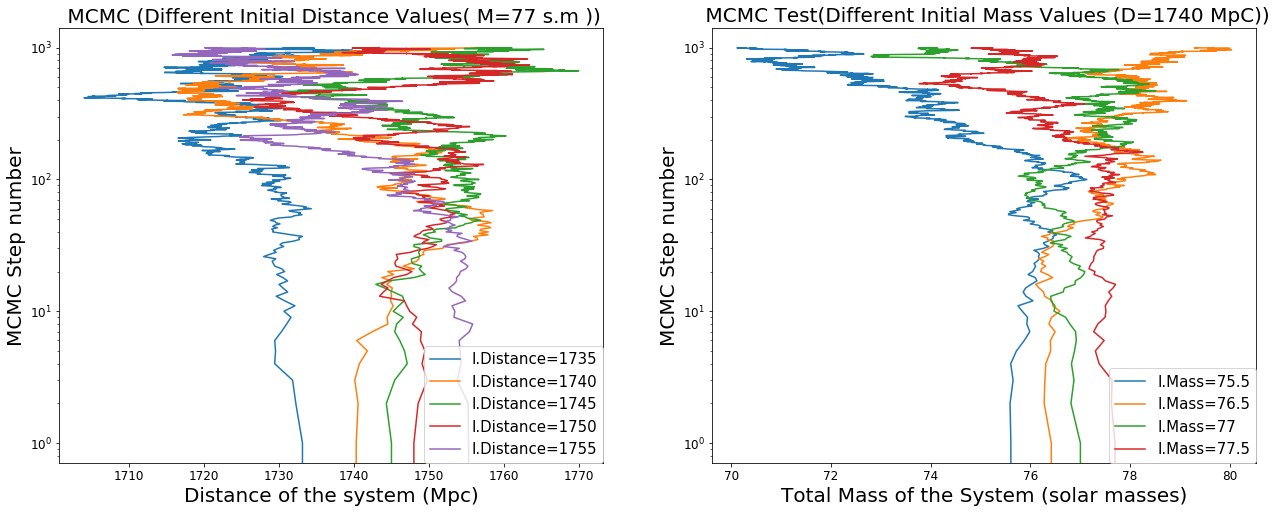

In [131]:

MaxIterationss=1000       #Since we will create multiple MCMC chains,we will choose a smaller number of iterations than before for testint covergence                
burnin=100
thinning=10
Initialvalues=[75.5,76.5,77,77.5,78.5]              #We will try for 5 different mass values
MCMC_triess = np.linspace(0,(MaxIterationss),(MaxIterationss+1))     # generate x for plotting,We wont use the burn-in sample values for this test

results1,burntresults1,thinningresults1=MCMC_2(Initialvalues[0],1740,MaxIterationss,burnin,thinning)
results2,burntresults2,thinningresults2=MCMC_2(Initialvalues[1],1740,MaxIterationss,burnin,thinning)
results3,burntresults3,thinningresults3=MCMC_2(Initialvalues[2],1740,MaxIterationss,burnin,thinning)
results4,burntresults4,thinningresults4=MCMC_2(Initialvalues[3],1740,MaxIterationss,burnin,thinning)
results5,burntresults5,thinningresults5=MCMC_2(Initialvalues[4],1740,MaxIterationss,burnin,thinning)

results1d,burntresults1d,thinningresults1d=MCMC_2(77,1735,MaxIterationss,burnin,thinning)
results2d,burntresults2d,thinningresults2d=MCMC_2(77,1740,MaxIterationss,burnin,thinning)
results3d,burntresults3d,thinningresults3d=MCMC_2(77,1745,MaxIterationss,burnin,thinning)
results4d,burntresults4d,thinningresults4d=MCMC_2(77,1750,MaxIterationss,burnin,thinning)
results5d,burntresults5d,thinningresults5d=MCMC_2(77,1755,MaxIterationss,burnin,thinning)

plt.figure(figsize=(7,8))
plt.subplot(121)

plt.semilogy(results1d['Distance'],MCMC_triess,label = 'I.Distance=1735')
plt.semilogy(results2d['Distance'],MCMC_triess,label = 'I.Distance=1740')
plt.semilogy(results3d['Distance'],MCMC_triess,label = 'I.Distance=1745')
plt.semilogy(results4d['Distance'],MCMC_triess,label = 'I.Distance=1750')
plt.semilogy(results5d['Distance'],MCMC_triess,label = 'I.Distance=1755')
plt.title(' MCMC (Different Initial Distance Values( M=77 s.m ))',size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Distance of the system (Mpc)',size=20)
plt.ylabel('MCMC Step number',size=20)
plt.legend(loc='lower right', borderaxespad=0.,fontsize=15)





plt.subplot(122)
plt.semilogy(results1['Mass'],MCMC_triess,label = 'I.Mass=75.5')
plt.semilogy(results2['Mass'],MCMC_triess,label = 'I.Mass=76.5')
plt.semilogy(results3['Mass'],MCMC_triess,label = 'I.Mass=77')
plt.semilogy(results4['Mass'],MCMC_triess,label = 'I.Mass=77.5')
plt.title(' MCMC Test(Different Initial Mass Values (D=1740 MpC))',size=20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Total Mass of the System (solar masses)',size=20)
plt.ylabel('MCMC Step number',size=20)
plt.legend(loc='lower right', borderaxespad=0.,fontsize=15)
plt.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)
plt.show()

# F.3)

In [109]:
import scipy.stats
Massmedian=np.median(burntresultsMCMC2['Mass'])   #We will consider the "burn in" results,i.e,we will not take into account the first MCMC steps 
Distancemedian=np.median(burntresultsMCMC2['Distance'])
print('The median of Distance from the MCMC is {:.2f} Mpc'.format(Distancemedian))
#We will use scipy in order to calculate the confidence interval:

print('The median of Mass from the MCMC is {:.2f} solar mases'.format(median))
#We will use scipy in order to calculate the confidence interval:
def mean_confidence_interval(data, confidence=0.90):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m,h

valm,incm=mean_confidence_interval(burntresultsMCMC2['Mass'], confidence=0.90)
vald,incd=mean_confidence_interval(burntresultsMCMC2['Distance'], confidence=0.90)

print('The 90% credible limits of the Total Mass of the System from the MCMC is {:.2f}'.format(valm)+' +- {:.2f}'.format(incm))

print('The 90% credible limits of  the Distance from the MCMC is {:.2f}'.format(vald)+' +- {:.2f}'.format(incd))

The median of Distance from the MCMC is 1742.90 Mpc
The median of Mass from the MCMC is 72.85 solar mases
The 90% credible limits of the Total Mass of the System from the MCMC is 80.15 +- 0.04
The 90% credible limits of  the Distance from the MCMC is 1741.97 +- 0.35


Text(0.5,1,' Waveforms Comparison')

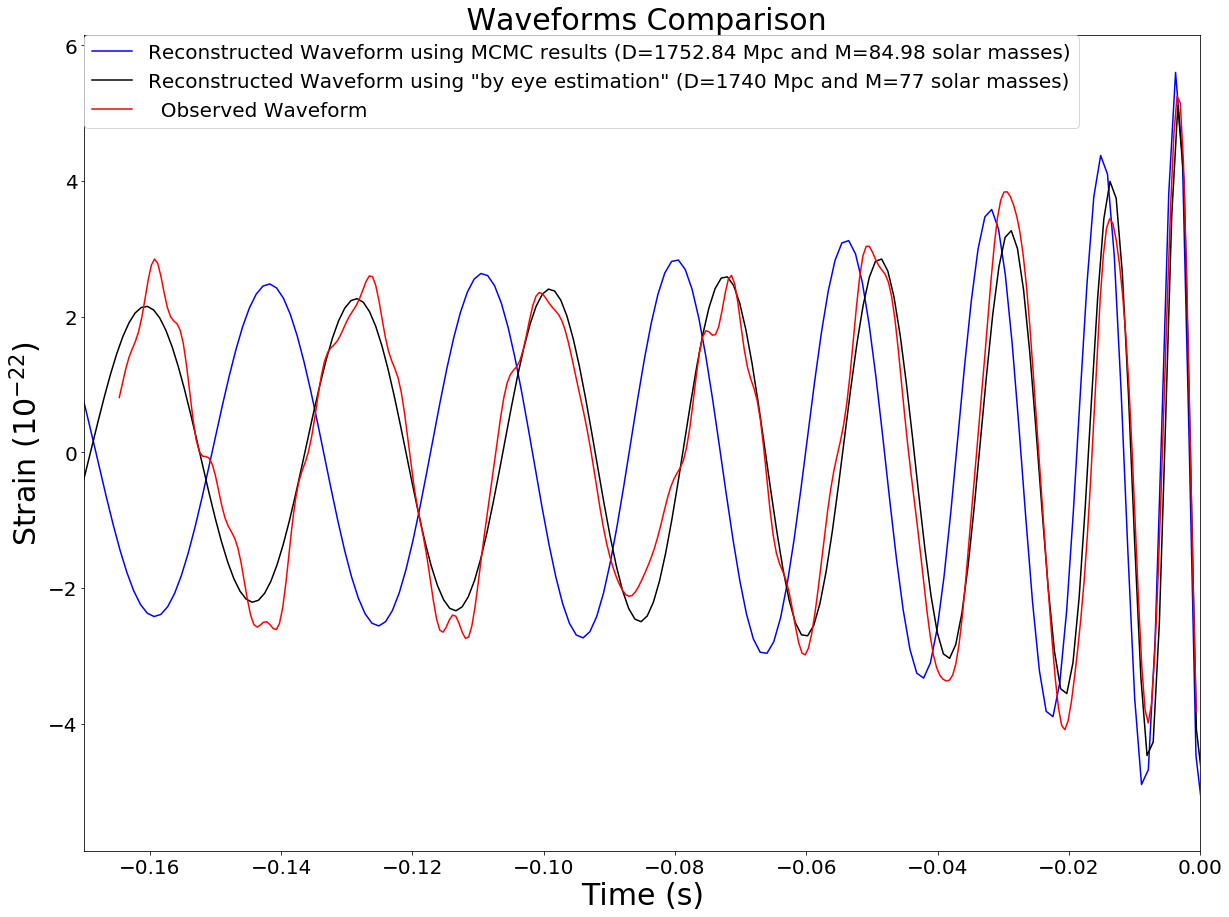

In [130]:
plt.figure(figsize=(20,15))

ftimeMCMC2,fstrainMCMC2=scalingfunction((burntresultsMCMC2['Distance']).iloc[-1],(burntresultsMCMC2['Mass']).iloc[-1]) 
ftimebyeye,fstrainbyeye=scalingfunction(1740,77)  
plt.plot(referencetime*ftimeMCMC2,referencestrain*fstrainMCMC2*(10**22) ,color='blue',label='Reconstructed Waveform using MCMC results (D={:.2f}'.format((burntresultsMCMC2['Distance']).iloc[-1]) +' Mpc and M={:.2f}'.format((burntresultsMCMC2['Mass']).iloc[-1])+' solar masses)')
plt.plot(referencetime*ftimebyeye,referencestrain*fstrainbyeye*(10**22) ,color='black',label='Reconstructed Waveform using "by eye estimation" (D=1740 Mpc and M=77 solar masses)')
plt.plot(adjustedobservedtime,adjustedobservedstrain*(10**22),color='red',label='  Observed Waveform ')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlim([-0.17, 0])       
plt.legend(loc='upper left', borderaxespad=0.,fontsize=20)
plt.xlabel('Time (s)',size=30)
plt.ylabel(r'Strain $(10^{-22}$)',size=30)
plt.title(' Waveforms Comparison',size=30)




***

## Part G - Putting it all together 

If you run into any difficulties completing Parts E and F, you can still attempt this part using your by-eye estimates for $M$ and $D$ from Part C.

1. Calculate the chirp mass for your system and the individual masses of your merging bodies. Comment on your individual masses. <div align="right">**[4 marks]**</div><br>

2. Plot your MCMC derived properties alongside the previously discovered gravitational wave systems. <div align="right">**[5 marks]**</div><br>
 
3. Estimate the period from your observed waveform around the peak amplitude of the wave. <div align="right">**[8 marks]**</div><br>

4. Assuming that the objects are not spinning, and that their orbits are Keplerian and essentially circular, use your period to estimate the orbital separation in **km** of the two bodies around peak amplitude. Think carefully about how the orbital period is related to the period of your gravitational wave.    <div align="right">**[10 marks]**</div><br>

5. Comment on what your analysis suggests are the best astrophysical candidates for the merging objects? <div align="right">**[3 marks]**</div>

# **Answer:**

# G.1)


The chirp mass is given by:

$$M_{ch} = \dfrac{(M_1 M_2)^{3/5}}{(M_1 + M_2)^{1/5}}.$$

for calculate the individual masses we will take into account that 
$$M =(M_1+ M_2)$$
And we will take the asumptio for part 3. That is,the two boy have equal masses:
$$q=M_2/M_1 = 1$$

We will use the value of $M$ according to part C(estimation by ete)  and E and F(MMCM stimation):

In [111]:
#Using the Mass value from part C:
Mtot=77
M1=0.5*Mtot
M2=0.5*Mtot
Mchirp=(((M1*M2)**(3/5))/((M1+M2)**(1/5)))

print('[Using by eye stimation results] The individual masses of the merging bodies are M1=M2= {:.2f} solar masses'.format(M1))
print('[Using by eye stimation results] The chirp mass for the system is Mch= {:.2f} solar masses'.format(Mchirp))

[Using by eye stimation results] The individual masses of the merging bodies are M1=M2= 38.50 solar masses
[Using by eye stimation results] The chirp mass for the system is Mch= 33.52 solar masses


In [112]:
#Using the Mass value from part E:

In [113]:
Mtot=78.58
M1=0.5*Mtot
M2=0.5*Mtot
Mchirp=(((M1*M2)**(3/5))/((M1+M2)**(1/5)))

print('[Using MCMC results(part E,single parameter)] The individual masses of the merging bodies are M1=M2= {:.2f} solar masses'.format(M1))
print('[Using MCMC results(part E,single parameter)] The chirp mass for the system is Mch= {:.2f} solar masses'.format(Mchirp))


[Using MCMC results(part E,single parameter)] The individual masses of the merging bodies are M1=M2= 39.29 solar masses
[Using MCMC results(part E,single parameter)] The chirp mass for the system is Mch= 34.20 solar masses


In [114]:
#Using the Mass value from part F:

In [115]:
Mtot=84.98
M1=0.5*Mtot
M2=0.5*Mtot
Mchirp=Mchirp=(((M1*M2)**(3/5))/((M1+M2)**(1/5)))

print('[Using MCMC results(part E,double parameter)] The individual masses of the merging bodies are M1=M2= {:.2f} solar masses'.format(M1))
print('[Using MCMC results(part E,double parameter)] The chirp mass for the system is Mch= {:.2f} solar masses'.format(Mchirp))


[Using MCMC results(part E,double parameter)] The individual masses of the merging bodies are M1=M2= 42.49 solar masses
[Using MCMC results(part E,double parameter)] The chirp mass for the system is Mch= 36.99 solar masses


# G.2)

*(The analysis of the properties and the result of the MCM has been carried out in each of the sections (E and F))

To have an idea of how well the MCMC results have been adjusted to the observed data, we are going to represent in the same graph the adjusted reference waveform from MCMC part E and F together with the observed data:

Text(0.5,1,' Waveforms Comparison')

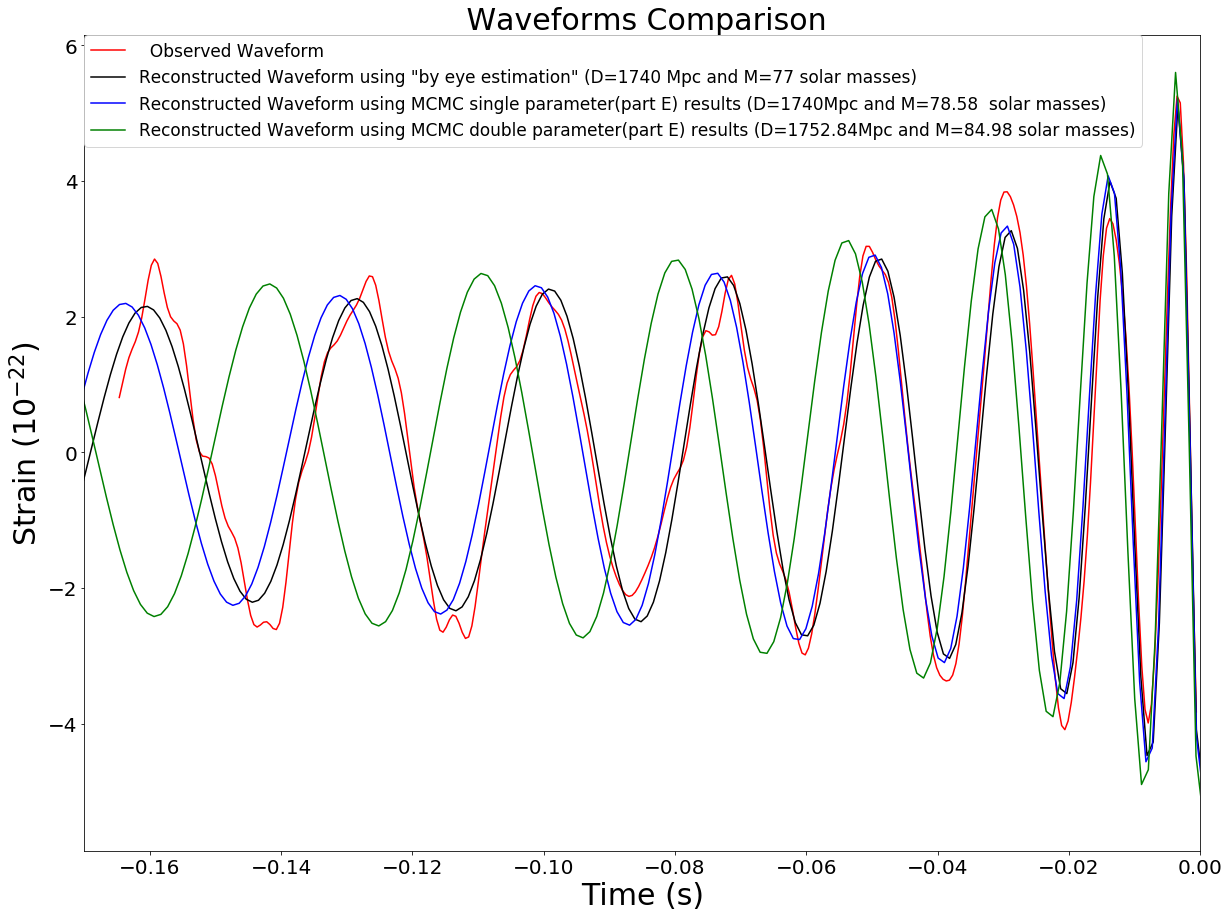

In [117]:
ftimebyeye,fstrainbyeye=scalingfunction(1740,77)    #from par C.3)
ftimeMCMC1,fstrainMCMC1=scalingfunction(1740,burntresultsMCMC1[-1])    #From part E
ftimeMCMC2,fstrainMCMC2=scalingfunction((burntresultsMCMC2['Distance']).iloc[-1],(burntresultsMCMC2['Mass']).iloc[-1])   #From part F 
  

plt.figure(figsize=(20,15))
plt.plot(adjustedobservedtime,adjustedobservedstrain*(10**22),color='red',label='  Observed Waveform ')
plt.plot(referencetime*ftimebyeye,referencestrain*fstrainbyeye*(10**22) ,color='black',label='Reconstructed Waveform using "by eye estimation" (D=1740 Mpc and M=77 solar masses)')
plt.plot(referencetime*ftimeMCMC1,referencestrain*fstrainMCMC1*(10**22) ,color='blue',label='Reconstructed Waveform using MCMC single parameter(part E) results (D=1740Mpc and M={:.2f}  solar masses)'.format(resultsMCMC1[-1]))
plt.plot(referencetime*ftimeMCMC2,referencestrain*fstrainMCMC2*(10**22) ,color='green',label='Reconstructed Waveform using MCMC double parameter(part E) results (D={:.2f}'.format((burntresultsMCMC2['Distance']).iloc[-1]) +'Mpc and M={:.2f}'.format((burntresultsMCMC2['Mass']).iloc[-1])+' solar masses)')

plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlim([-0.17, 0])       
plt.legend(loc='upper left', borderaxespad=0.,fontsize=17)
plt.xlabel('Time (s)',size=30)
plt.ylabel(r'Strain $(10^{-22}$)',size=30)
plt.title(' Waveforms Comparison',size=30)


**Although the three methods generate strain values very similar to the observed data, we can distinguish that the MCMC of double parameter estimation (F) generates better results.**

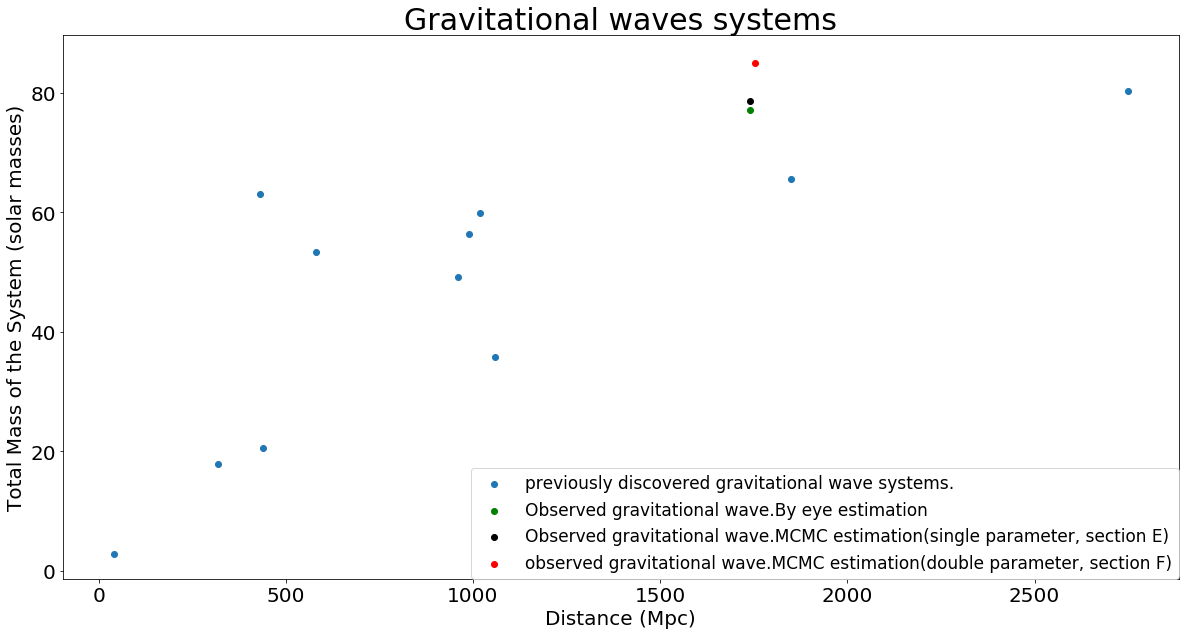

In [120]:
fig, ax = plt.subplots(figsize=(20, 10))


ax.scatter(Distance, Mtot,label='previously discovered gravitational wave systems.')
ax.scatter(1740,77,label='Observed gravitational wave.By eye estimation',color='green')
ax.scatter(1740,burntresultsMCMC1[-1],label='Observed gravitational wave.MCMC estimation(single parameter, section E)',color='black')
ax.scatter((burntresultsMCMC2['Distance']).iloc[-1] ,(burntresultsMCMC2['Mass']).iloc[-1],label='observed gravitational wave.MCMC estimation(double parameter, section F)',color='red')
ax.set_xlabel('Distance (Mpc)',size=20)
ax.set_ylabel('Total Mass of the System (solar masses)',size=20)
ax.set_title('Gravitational waves systems',size=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc='lower right', borderaxespad=0.,fontsize=17)

plt.show()



**Clearer plot, without error bars.We can see how the results obtained make sense and fit the mass-distance relationship of the other systems of the graph.** 


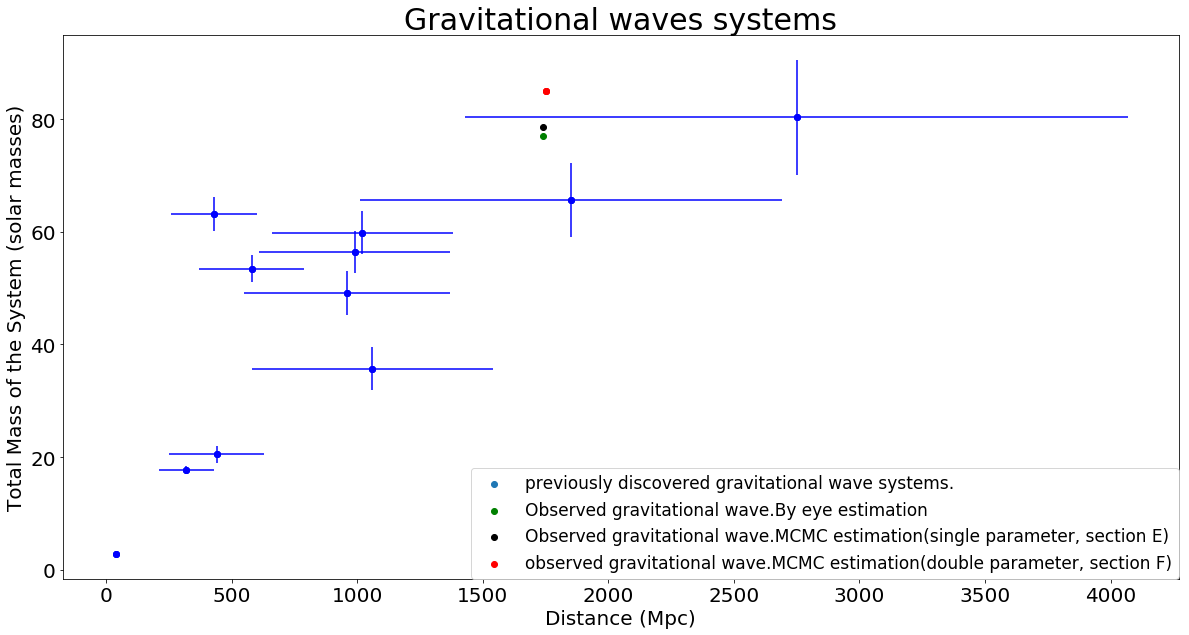

In [121]:
#plot with error bars
fig, ax = plt.subplots(figsize=(20, 10))


ax.scatter(Distance, Mtot,label='previously discovered gravitational wave systems.')
ax.scatter(1740,77,label='Observed gravitational wave.By eye estimation',color='green')
ax.scatter(1740,burntresultsMCMC1[-1],label='Observed gravitational wave.MCMC estimation(single parameter, section E)',color='black')
ax.scatter((burntresultsMCMC2['Distance']).iloc[-1] ,(burntresultsMCMC2['Mass']).iloc[-1],label='observed gravitational wave.MCMC estimation(double parameter, section F)',color='red')
ax.set_xlabel('Distance (Mpc)',size=20)
ax.set_ylabel('Total Mass of the System (solar masses)',size=20)
ax.set_title('Gravitational waves systems',size=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc='lower right', borderaxespad=0.,fontsize=17)
##########errors for the observed gravitational waves(given in the csv.file)######
plt.errorbar(Distance, Mtot, yerr=Mtot_error, fmt='o',color='blue')
plt.errorbar(Distance, Mtot, xerr=Distance_error, fmt='o',color='blue')




##########errors for the observed gravitational waves from MCMC PART F######
valm,incm=mean_confidence_interval(burntresultsMCMC2['Mass'], confidence=0.90)
vald,incd=mean_confidence_interval(burntresultsMCMC2['Distance'], confidence=0.90)               
plt.errorbar((burntresultsMCMC2['Distance']).iloc[-1], (burntresultsMCMC2['Mass']).iloc[-1], yerr=incm, fmt='o',color='red')
plt.errorbar((burntresultsMCMC2['Distance']).iloc[-1], (burntresultsMCMC2['Mass']).iloc[-1], xerr=incd, fmt='o',color='red')
plt.show()

plt.show()


**In the graph the gravitational wave system  is indicated with different colors (according to the method) As well as with its errors.
-For the case of by eye stimation we wont plot any errors.However we could have consider a error for the mass of
+-5 Msun and +-100 Mpc for the distance,since we are estimating with our eye,a bad approximation 
-According to question 1.C for calculate the errors from the MCMC:
The errors in these values are the credible intervals from the posterior distribution derived for each parameter. 
We will take the 90% credible intervals. **


**The values obtained from the MCMC of the mass and distance with each of the two methods (E and F) do not fall within the range of uncertainty of each one. However, the MCMC of double parameter estimation (F) generates better results.**

# G.3)

First we need to recall that the period of a wave is defined as the time for a particle on a medium to make one complete vibrational cycle. Period, being a time, is measured in units of time such as seconds

We are gonna calculate the period of our observed datausing scipy.We will just find the local maximum using signal analysis in order to calculate the period near the merge. We will choose the two  local maximum points which are nearest to the merge event $t_2$ and $t_1$. Using the definition of period from a wave,we just need to substract the value of this two points in order to calculate the Period.


Text(0.5,1,' Observed Waveform')

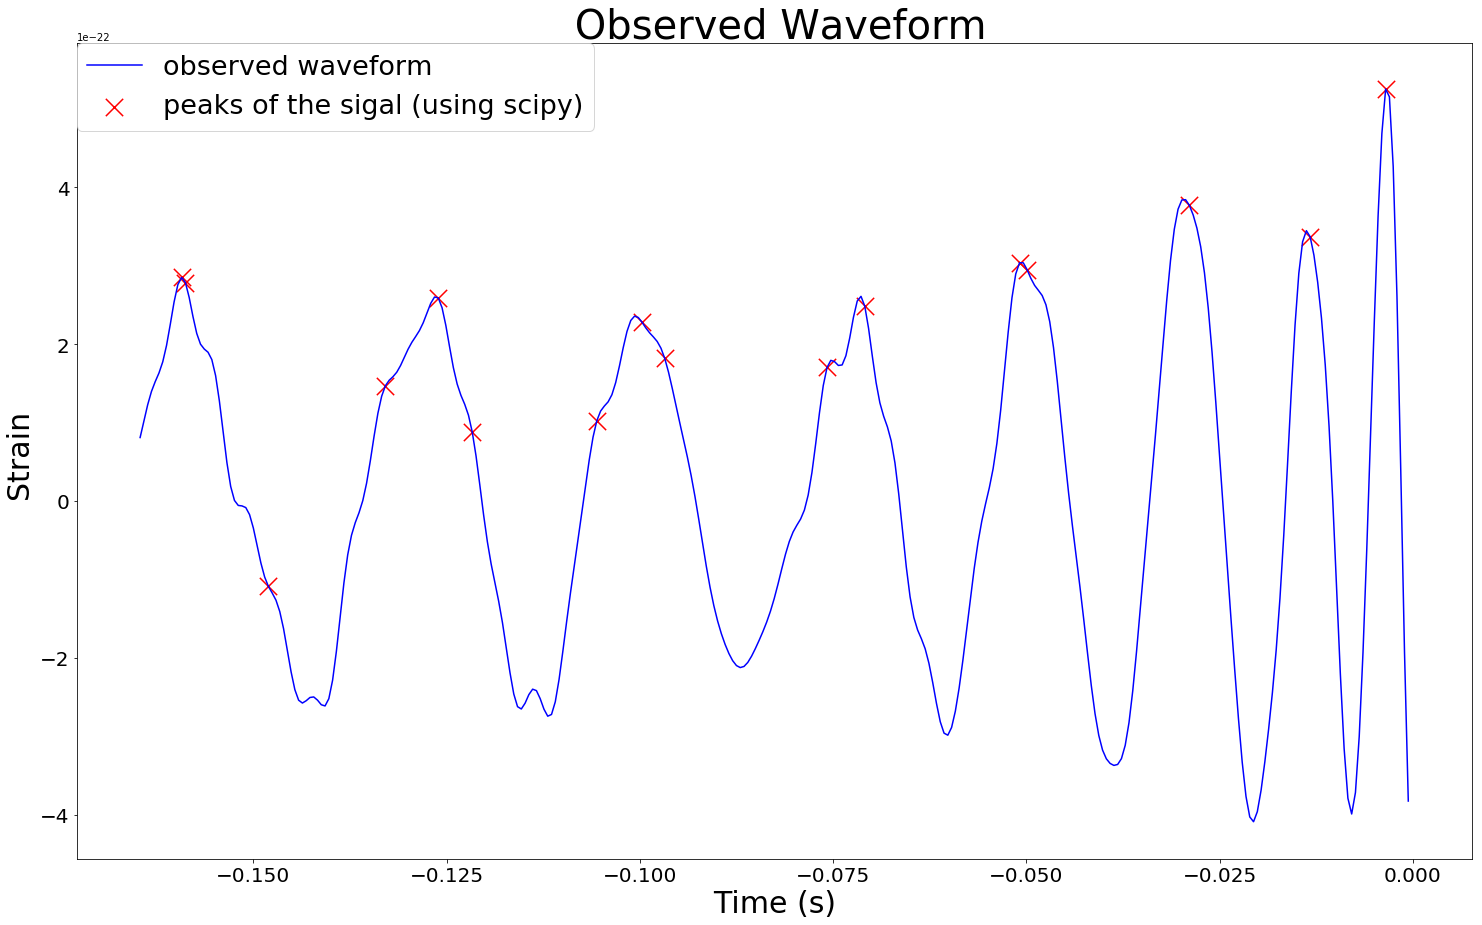

In [122]:
from scipy import signal
maxvaluesignalindex= signal.find_peaks_cwt(adjustedobservedstrain, np.arange(1,10))
maxvaluesignalindex
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(adjustedobservedtime,adjustedobservedstrain,color='blue',label='observed waveform')
plt.xticks(size = 20)
plt.yticks(size = 20)
ax.scatter(adjustedobservedtime[maxvaluesignalindex], adjustedobservedstrain[maxvaluesignalindex], label='peaks of the sigal (using scipy)',marker='x',color='red',s=300);
ax.legend(loc='upper left', borderaxespad=0.,fontsize=27)
ax.set_xlabel('Time (s)',size=30)
ax.set_ylabel('Strain ',size=30)
ax.set_title(' Observed Waveform',size=40)



In [123]:
#So,we just have found using sscipty that near the merge event the two local maxium for the signal take the values: 
t2=adjustedobservedtime[maxvaluesignalindex[-1]]
t1=adjustedobservedtime[maxvaluesignalindex[-2]]
print('near the merge event the two local maxium for the signal occur at the momments:')
print('t1={:.20f}'.format(t1))
print('t2={:.20f}'.format(t2))
0.5*((2*np.pi)/(t2-t1))

near the merge event the two local maxium for the signal occur at the momments:
t1=-0.01329064369201660156
t2=-0.00352478027343750000


321.69123393770377

$t_2=-0.013$ s

$t_1=-0.0035$ s

Thus,

$T_{obs}=(t_2 -t_1) =0.0098$ s

Transform $T_{obs}$ into $\omega_{obs}$ is almost direct:

$\omega_{obs}= \dfrac{2\pi}{T_{obs}}$

Thus,

$ \omega_{obs}= 643.38 $ $s^{-1}$

# G.4)


To estimate the orbital separation in km of the two bodies around peak amplitude we will
use the following expression:
$R = \left(\dfrac{G (M_1+M_2)}{\omega_{\rm max}^2}\right)^{1/3}.$

Where $G$ Takes the value of $G=6.63·10^{-11} N·m$

Note that after half a revolution, the two stars have just swapped their positions. The second half of the orbit repeats the motion pattern of the first half, and the gravitational wave signal is therefore repeated accordingly. One orbital period in the graviational waves observed therefore comprises two periods of the gravitational wave signal.

Thus, $\omega_{\rm max}=0.5·\omega_{\rm obs}= 0.5·643.38 = 321.69 $ $s^{-1}$
In conclusion:


In [124]:
#Using the Mass value from part C:
Mtot=77
M1=0.5*Mtot
M2=0.5*Mtot

wmax=321.70
R=(((((6.63*(10**-11))*((M1*2*(10**30))+(M2*2*(10**30))))/(wmax**2)))**(1/3))*(10**-3)
print('[Using by eye stimation results] The orbital separation in km of the two bodies around peak amplitude is R={:.7f} km'.format(R))

[Using by eye stimation results] The orbital separation in km of the two bodies around peak amplitude is R=462.0731242 km


In [125]:
#Using the Mass value from part E:

In [127]:
Mtot=78.58
M1=0.5*Mtot
M2=0.5*Mtot

wmax=321.70
R=(((((6.63*(10**-11))*((M1*2*(10**30))+(M2*2*(10**30))))/(wmax**2)))**(1/3))*(10**-3)
print('[Using MCMC results(part E,single parameter)]The orbital separation in km of the two bodies around peak amplitude is R={:.7f} km'.format(R))

[Using MCMC results(part E,single parameter)]The orbital separation in km of the two bodies around peak amplitude is R=465.2122502 km


In [128]:
#Using the Mass value from part F:

In [129]:
Mtot=84.98
M1=0.5*Mtot
M2=0.5*Mtot

wmax=321.70
R=(((((6.63*(10**-11))*((M1*2*(10**30))+(M2*2*(10**30))))/(wmax**2)))**(1/3))*(10**-3)
print('[Using MCMC results(part E,double parameter)] The orbital separation in km of the two bodies around peak amplitude is R={:.7f} km'.format(R))

[Using MCMC results(part E,double parameter)] The orbital separation in km of the two bodies around peak amplitude is R=477.5139275 km


# G.5)

$M_1$ and $M_2$ suggest that the astrophysical objetcs are two binary black holes. According to [The Physical and Mathematical Foundations of the Theory of Relativity: A Critical Analysis pag. 421] black holes can be classified by size as can see in the following table:


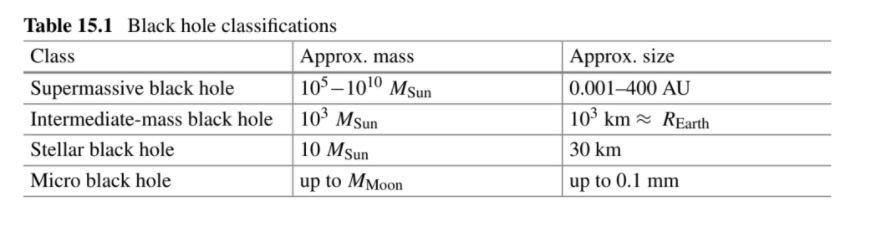

To make an educated guess of which objects have been able to produce that gravitational wave, we simply have to discard by size the objects that certainly have not been able to produce it, such as neutron stars, supermassive black holes, etc. To do this, we have to consult the table above together with any other source that classifies astrophysical objects by size in solar masses

Taking as valid the previous discoveries made by LIGO, we can say that  in our case that  the best astrophysical candidates for the merging objects are two stellar black holes.

# Final Conclusion

In recent years, gravitational waves have occupied much of the scientific and media interest. These ripples in the space-time fabric provide us with information about their dramatic origins and about the nature of gravity that could not be obtained otherwise.

In this work we have tried to obtain the mass and distance parameters for a gravitational wave event by adjusting a waveform template to the real observed data.We have found that the MCMC of two parameters generates better results than the MCMC of a simple parameter and "by eye" estimates.

When performing a Bayesian analysis of astronomical data, in general, two main problems arise that are difficult to solve: 

-In the estimation of parameters of some models for the data, the resulting a priori probability distributions can be multimodal or exihibit steep curves causing problems in MCMC methods. 

-The calculation of evidence for, in our case,  for a noise model.

In conclusion, generally for a good estimate of parameters the choice of walkers and the number of MCMC steps will depend a lot on the problem to be studied.



## Part H - Understanding, Presentation and Interpretation

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>

*All the comments and analysis of the relevant results (and graphics) can be found in the corresponding question section.